In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("weather.csv")

In [3]:
data

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [4]:
#Removed NaN values
data = data.dropna()
data = data.reset_index()
data = data.drop(columns="index")

In [5]:
data

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0      2009-01-01    Cobar     17.9     35.2       0.0         12.0      12.3   
1      2009-01-02    Cobar     18.4     28.9       0.0         14.8      13.0   
2      2009-01-04    Cobar     19.4     37.6       0.0         10.8      10.6   
3      2009-01-05    Cobar     21.9     38.4       0.0         11.4      12.2   
4      2009-01-06    Cobar     24.2     41.0       0.0         11.2       8.4   
...           ...      ...      ...      ...       ...          ...       ...   
56415  2017-06-20   Darwin     19.3     33.4       0.0          6.0      11.0   
56416  2017-06-21   Darwin     21.2     32.6       0.0          7.6       8.6   
56417  2017-06-22   Darwin     20.7     32.8       0.0          5.6      11.0   
56418  2017-06-23   Darwin     19.5     31.8       0.0          6.2      10.6   
56419  2017-06-24   Darwin     20.2     31.7       0.0          5.6      10.7   

      WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0             SSW           48.0        ENE  ...        20.0         13.0   
1               S           37.0        SSE  ...        30.0          8.0   
2             NNE           46.0        NNE  ...        42.0         22.0   
3             WNW           31.0        WNW  ...        37.0         22.0   
4             WNW           35.0         NW  ...        19.0         15.0   
...           ...            ...        ...  ...         ...          ...   
56415         ENE           35.0         SE  ...        63.0         32.0   
56416           E           37.0         SE  ...        56.0         28.0   
56417           E           33.0          E  ...        46.0         23.0   
56418         ESE           26.0         SE  ...        62.0         58.0   
56419         ENE           30.0        ENE  ...        73.0         32.0   

       Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0           1006.3       1004.4       2.0       5.0     26.6     33.4   
1           1012.9       1012.1       1.0       1.0     20.3     27.0   
2           1012.3       1009.2       1.0       6.0     28.7     34.9   
3           1012.7       1009.1       1.0       5.0     29.1     35.6   
4           1010.7       1007.4       1.0       6.0     33.6     37.6   
...            ...          ...       ...       ...      ...      ...   
56415       1013.9       1010.5       0.0       1.0     24.5     32.3   
56416       1014.6       1011.2       7.0       0.0     24.8     32.0   
56417       1015.3       1011.8       0.0       0.0     24.8     32.1   
56418       1014.9       1010.7       1.0       1.0     24.8     29.2   
56419       1013.9       1009.7       6.0       5.0     25.4     31.0   

       RainToday  RainTomorrow  
0             No            No  
1             No            No  
2             No            No  
3             No            No  
4             No            No  
...          ...           ...  
56415         No            No  
56416         No            No  
56417         No            No  
56418         No            No  
56419         No            No  

[56420 rows x 23 columns]

In [6]:
data["Location"].unique()

array(['Cobar', 'CoffsHarbour', 'Moree', 'NorfolkIsland', 'Sydney',
       'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Canberra', 'Sale',
       'MelbourneAirport', 'Melbourne', 'Mildura', 'Portland', 'Watsonia',
       'Brisbane', 'Cairns', 'Townsville', 'MountGambier', 'Nuriootpa',
       'Woomera', 'PerthAirport', 'Perth', 'Hobart', 'AliceSprings',
       'Darwin'], dtype=object)

In [7]:
data["MinTemp"].unique()

array([17.9, 18.4, 19.4, 21.9, 24.2, 27.1, 23.3, 16.1, 19. , 19.7, 20.9,
       23.9, 24.9, 25.2, 21.6, 21.4, 25.4, 21.8, 20.3, 22.1, 23.8, 27. ,
       26.2, 25. , 25.1, 24.8, 27.6, 23.6, 24.1, 27.2, 29.1, 28.9, 19.3,
       14.1, 14.5, 16.8, 16. , 17.4, 15.9, 16.5, 20.4, 19.9, 17.2, 21. ,
       18.7, 22.2, 16.9, 20. , 23. , 18.6, 11.9, 13.1, 21.1, 19.5, 18.5,
        9.2, 12.1, 13.9, 15.3, 17.6, 19.1, 21.3, 19.2, 23.5, 20.8, 16.6,
       17.3, 18. , 15.6,  9.9, 10.7,  9.4, 13.5, 17.1, 16.2, 14.9, 11.7,
       11.2, 11.4, 13.3, 12.3, 12. , 16.7, 12.7,  5.7, 12.4,  6.2,  6.6,
        7.5,  8.5,  9.7,  5.9,  7.9,  7.7, 10.4,  9. ,  5.4,  8.8,  7.8,
       12.8, 12.5, 10.9, 12.6, 13.2, 13. ,  7.2,  2.4,  6.8, 11.3, 11.1,
       11.6,  6.9,  6.5,  5.5,  0.2,  1.9,  6.1,  8.3,  4.7,  5.2,  6.7,
        9.5,  7.4,  9.8,  8.7,  4.3,  7.1,  4.4,  1.7,  5.3,  6.3,  5.6,
        8.4, 10.5,  3.2,  3.7,  8.2, 12.2,  5.1,  1.2,  3.4,  8.9,  4.6,
        3.6,  4.9,  9.3,  8. ,  2.3,  4.1, 13.4, 10

In [8]:
data["MaxTemp"].unique()

array([35.2, 28.9, 37.6, 38.4, 41. , 36.1, 34. , 34.2, 35.5, 37.8, 39.1,
       41.2, 40.5, 31.8, 37.5, 39.4, 33.5, 30.7, 36. , 34.7, 37.3, 39.9,
       38.7, 38.5, 39.5, 39.3, 40.8, 40.3, 40.4, 41.4, 43.4, 43.5, 42. ,
       36.6, 28.1, 25.9, 30.1, 23.3, 19.1, 24.2, 19.7, 20.8, 27.4, 30.6,
       31.7, 34.3, 35.1, 33.1, 33.8, 36.9, 32.8, 31.1, 38.9, 24.5, 24.6,
       26.4, 29.6, 33.2, 33.4, 31.4, 32.2, 24.3, 24.4, 25.8, 29.5, 32.3,
       33.9, 35.9, 37. , 36.5, 36.4, 31.2, 31. , 31.6, 25.6, 28.4, 28.7,
       20.6, 23.9, 29.4, 23.8, 24.1, 24. , 23.4, 18.4, 19.9, 17. , 19.3,
       22.8, 23.1, 23.5, 21.7, 22.2, 23.2, 21.2, 20.4, 19.4, 14.7, 15.6,
       20. , 22.9, 21.5, 21.3, 16.3, 15.9, 17.7, 13. , 13.9, 18.6, 17.6,
       16.7, 14.5, 15.8, 14.3, 12.1, 12.8, 18. , 19. , 14.9, 17.1, 17.8,
       17.5, 17.3, 20.1, 20.9, 22.3, 16.6, 12.2, 14.6, 16. , 20.7, 16.5,
       13.5, 19.5, 12. , 13.7, 15.3, 22.7, 17.4, 15.5, 11.4, 15.1, 17.2,
       20.5, 19.2, 16.2, 21.4, 20.3, 28. , 18.2, 18

In [9]:
data["Rainfall"].unique()

array([0.000e+00, 4.800e+00, 1.800e+01, 8.600e+00, 6.000e-01, 1.600e+00,
       2.600e+01, 7.000e+00, 3.260e+01, 2.000e+00, 8.000e-01, 9.200e+00,
       2.000e-01, 1.440e+01, 2.400e+00, 5.400e+00, 1.000e+00, 7.600e+00,
       1.760e+01, 7.800e+00, 3.600e+00, 1.000e+01, 1.200e+01, 3.400e+00,
       3.880e+01, 6.400e+00, 5.800e+00, 1.800e+00, 4.000e-01, 8.000e+00,
       6.000e+00, 2.560e+01, 1.720e+01, 7.200e+00, 6.600e+00, 3.000e+00,
       3.600e+01, 9.600e+00, 2.240e+01, 4.400e+01, 2.600e+00, 1.280e+01,
       8.400e+00, 1.240e+01, 1.020e+01, 2.800e+00, 4.000e+00, 5.600e+00,
       2.780e+01, 4.600e+00, 3.200e+00, 1.660e+01, 3.000e+01, 3.860e+01,
       1.580e+01, 3.660e+01, 2.440e+01, 6.800e+00, 1.680e+01, 1.400e+00,
       1.140e+01, 1.040e+01, 7.400e+00, 1.560e+01, 1.740e+01, 9.400e+00,
       3.800e+01, 1.200e+00, 5.900e+01, 1.120e+01, 2.980e+01, 2.020e+01,
       4.200e+00, 4.280e+01, 1.960e+01, 1.060e+01, 1.220e+01, 5.580e+01,
       1.360e+01, 1.520e+01, 9.000e+00, 1.700e+01, 

In [10]:
data["Evaporation"].unique()

array([12. , 14.8, 10.8, 11.4, 11.2, 13. ,  9.8, 14.6, 11. , 12.8, 13.8,
       16.4, 17.4, 16. , 13.6,  8. ,  8.2,  8.6, 14.2, 12.6, 15.8, 16.2,
       13.4, 14.4, 11.8, 15.6, 15.2, 11.6,  9.6,  6.6,  0.6,  6. ,  3. ,
        2. ,  5.2,  9. , 10.2, 10. ,  7.4,  8.4,  9.2,  9.4, 12.4, 10.4,
        7.2,  6.8,  7.6,  6.4,  7.8,  7. ,  8.8,  6.2,  5.8,  0.2,  2.4,
        1.8,  2.8,  5. ,  4.4,  5.6,  4.8,  4.2,  4. ,  4.6,  3.4,  3.6,
        0. ,  1.4,  3.8,  2.2,  0.8,  2.6,  1.6,  1.2,  1. ,  3.2,  5.4,
       10.6, 16.8, 17. , 20.2, 14. , 17.2, 12.2, 15. , 18.2, 13.2,  4.1,
        1.7,  0.4,  4.9,  5.7, 15.4, 16.6, 19.6,  9.7, 10.5,  2.1,  5.9,
        2.3,  9.3, 20.4, 12.1, 30.6, 47.2, 38.4, 34.6, 19. , 23.6, 18.8,
       32.2, 31.4, 34.2, 18. , 18.4, 23. , 20.6, 26.8, 26.4, 34.4, 42.4,
       46.6, 60.2, 37.6, 36.4, 48.4, 21.8, 43.6, 35. , 50.4, 35.8, 54. ,
       41.2, 23.8, 32.8, 35.6, 31. , 35.4, 17.8, 27.4, 27. , 25.4, 57.2,
       48.8, 28.6, 33.6, 30.4, 37.4, 23.4, 43. , 36

In [11]:
data["Sunshine"].unique()

array([12.3, 13. , 10.6, 12.2,  8.4,  0. , 12.6, 13.2, 12.7, 12.1, 10.3,
       13.1, 12.9, 11.3,  6.9, 10.9,  3.7,  5.9, 10.5, 12.4, 13.4, 13.3,
       13.6,  7.4, 10. ,  2.3,  6.6,  0.3, 10.7, 11.6, 10.2,  9. , 12. ,
        3. ,  7.9, 11.5, 11.2,  4.8,  5.8,  6. , 11.1, 11.8, 11.4, 10.8,
        7.8, 11. ,  5.5,  4.7,  4.2,  4.4,  9.8,  9.9,  4.3,  8. ,  9.6,
       10.4,  9.3,  8.7,  7.6,  7.5, 10.1,  6.3,  2.8,  0.7,  9.4,  9.7,
        0.6,  8.3,  4.1,  3.9,  6.2,  6.8,  8.6,  2.7,  8.2,  3.1,  1.8,
        0.1,  0.8,  3.4,  5. ,  5.7,  6.1,  7. ,  2.9,  2.5,  7.1,  8.9,
        9.1,  1.7,  8.1,  9.5,  1.2,  1.4,  8.8,  2.2,  3.5,  9.2,  1.9,
       11.7, 11.9,  7.7,  0.9, 12.5, 12.8, 13.7,  8.5,  0.2,  4.6,  4. ,
        2.4,  5.1,  5.2,  0.5,  6.4,  4.5,  1.1,  2. ,  0.4,  1.5,  3.3,
        6.5,  2.6,  3.8,  3.6,  3.2,  5.4,  7.2,  6.7,  1. ,  5.3,  7.3,
        1.6,  4.9,  5.6,  1.3,  2.1, 13.8, 13.5, 14. , 13.9, 14.1, 14.5,
       14.3, 14.2])

In [12]:
data["WindGustDir"].unique()

array(['SSW', 'S', 'NNE', 'WNW', 'N', 'SE', 'ENE', 'NE', 'E', 'SW', 'W',
       'WSW', 'NNW', 'ESE', 'SSE', 'NW'], dtype=object)

In [13]:
data["WindGustSpeed"].unique()

array([ 48.,  37.,  46.,  31.,  35.,  43.,  41.,  30.,  39.,  44.,  33.,
        61.,  59.,  56.,  94.,  50.,  28.,  52.,  57.,  54.,  63.,  26.,
        24.,  65.,  20.,  17.,  22.,  15.,  19.,  83.,  74.,  72.,  76.,
        69.,  67.,  85.,  13.,  70.,  98.,  91.,  81.,  87.,  80., 117.,
        78.,  89.,  96.,  93., 107., 104., 106., 102., 115.,  11., 100.,
       109., 122.,   9., 124., 113., 111.])

In [14]:
data["WindDir9am"].unique()

array(['ENE', 'SSE', 'NNE', 'WNW', 'NW', 'N', 'S', 'SE', 'NE', 'W', 'SSW',
       'E', 'NNW', 'ESE', 'WSW', 'SW'], dtype=object)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cloud3

In [16]:
data["Cloud9am"].dtype

dtype('float64')

In [17]:
data["Year"] = data["Date"].str.split("-").str.get(0)
data["Month"] = data["Date"].str.split("-").str.get(1)
data["Day"] = data["Date"].str.split("-").str.get(2)
data.drop("Date",axis=1, inplace = True)

In [18]:
data["Year"] = data["Year"].astype(int)
data["Month"] = data["Month"].astype(int)
data["Day"] = data["Day"].astype(int)
float64 = [var for var in data.columns if data[var].dtype=='float64']
print(float64)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm


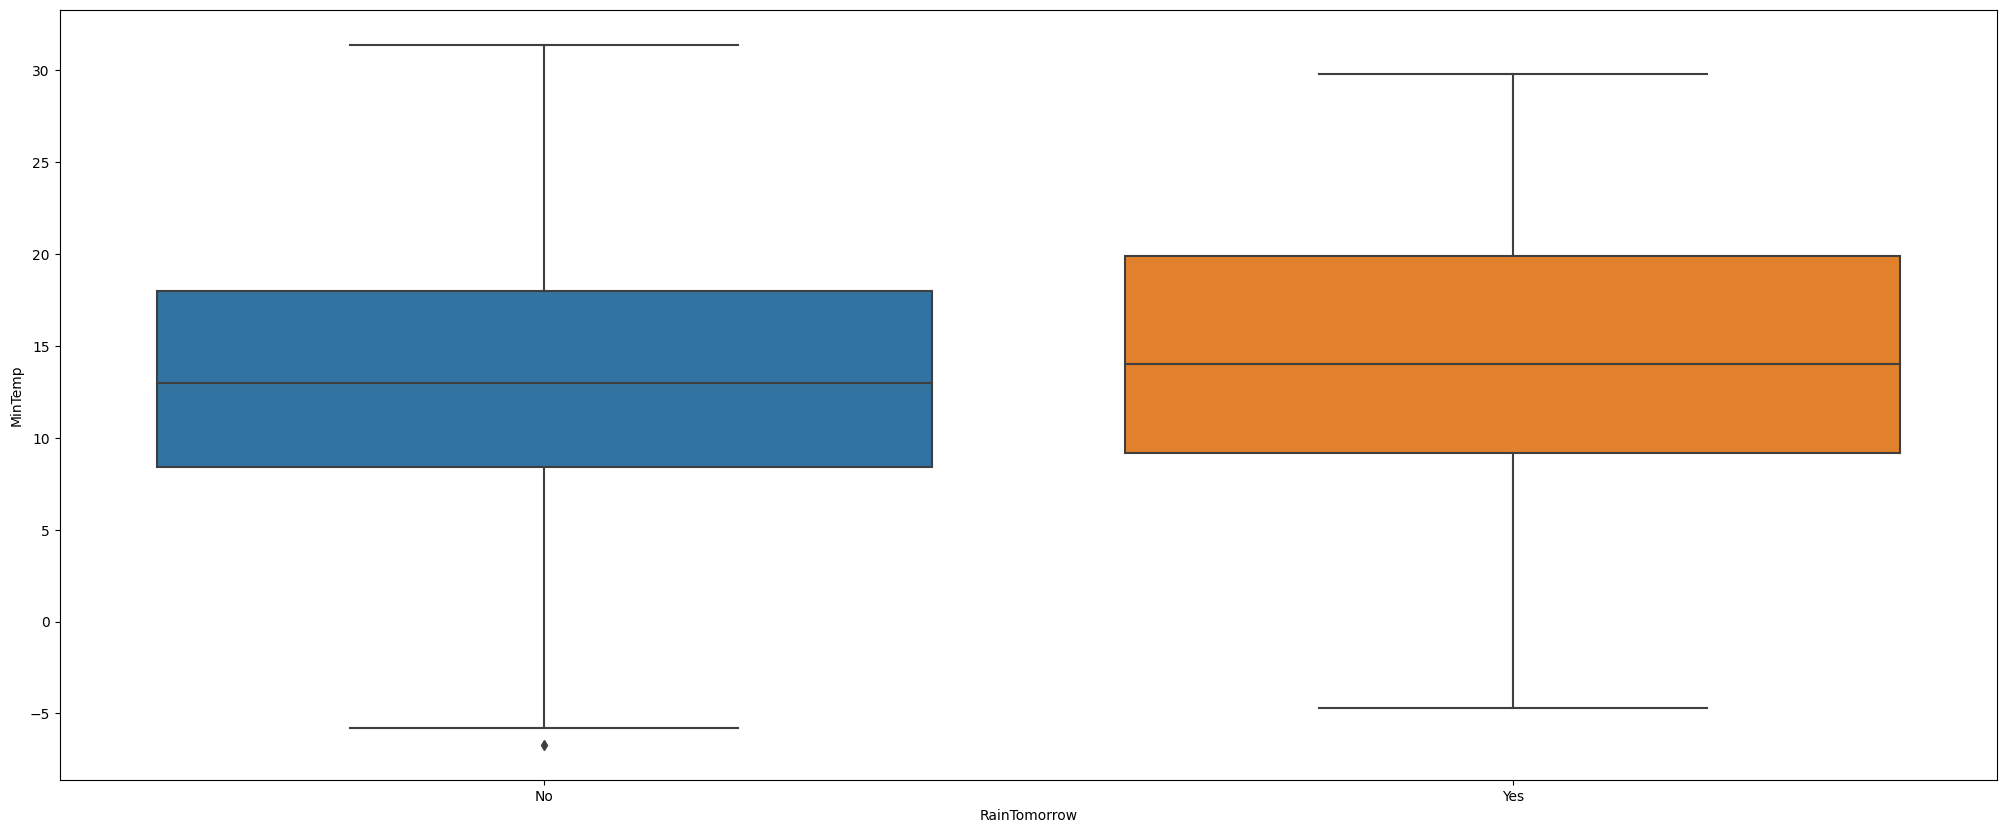

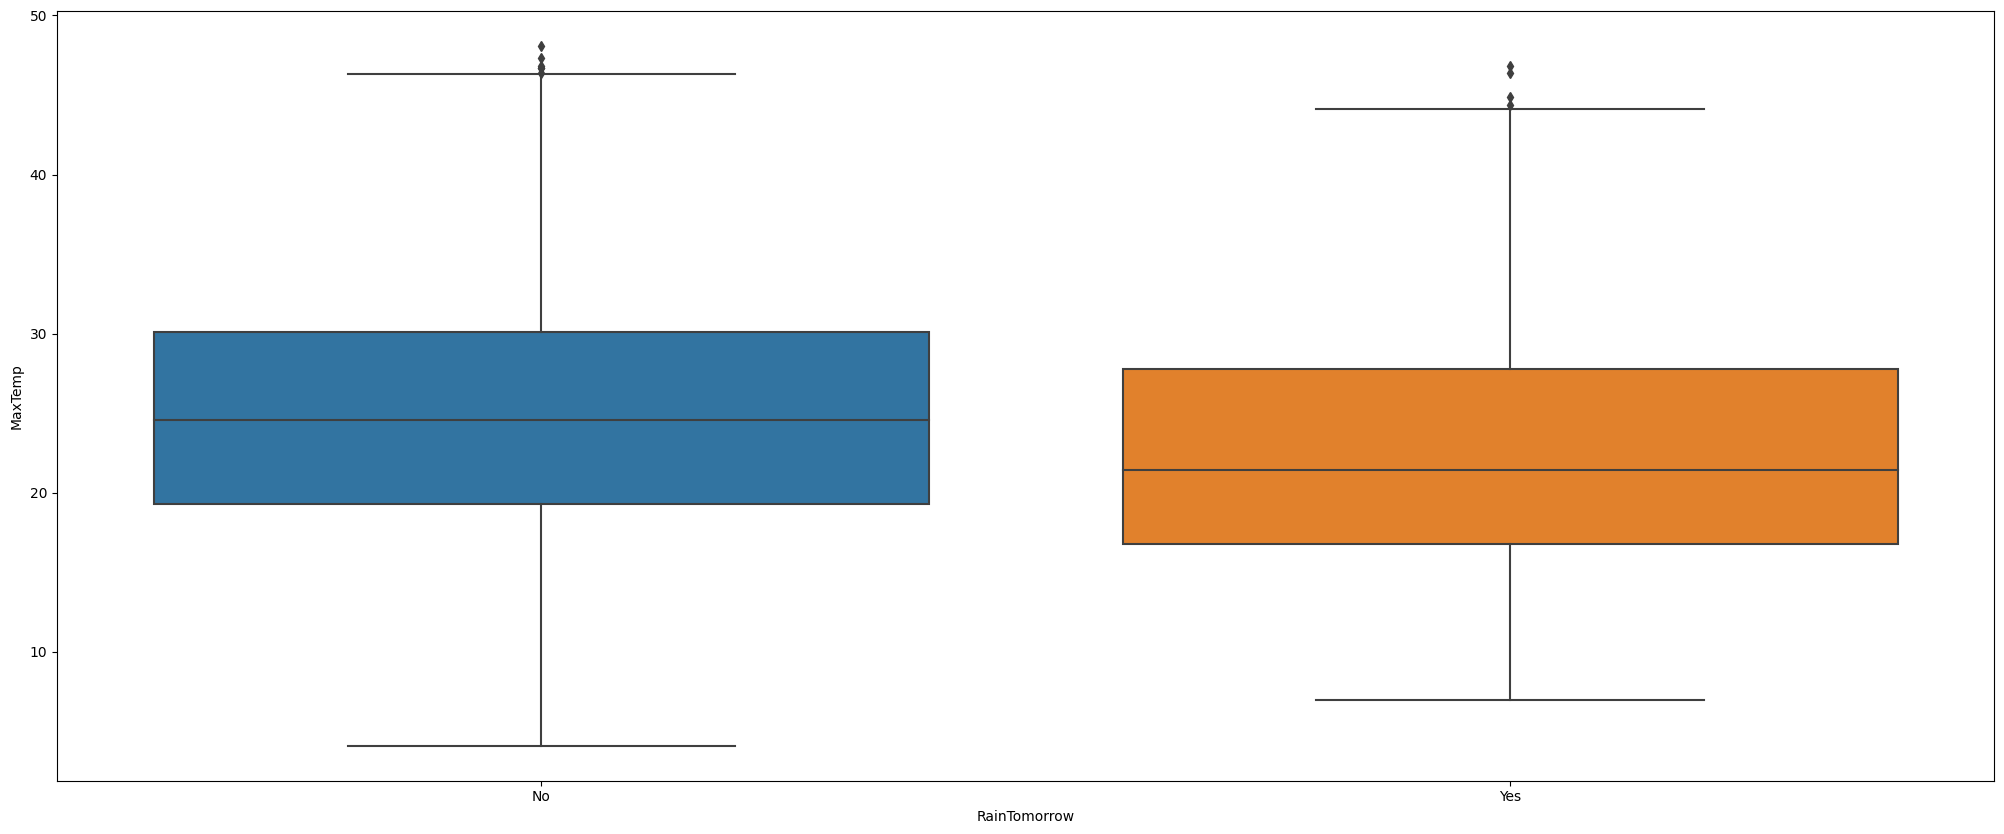

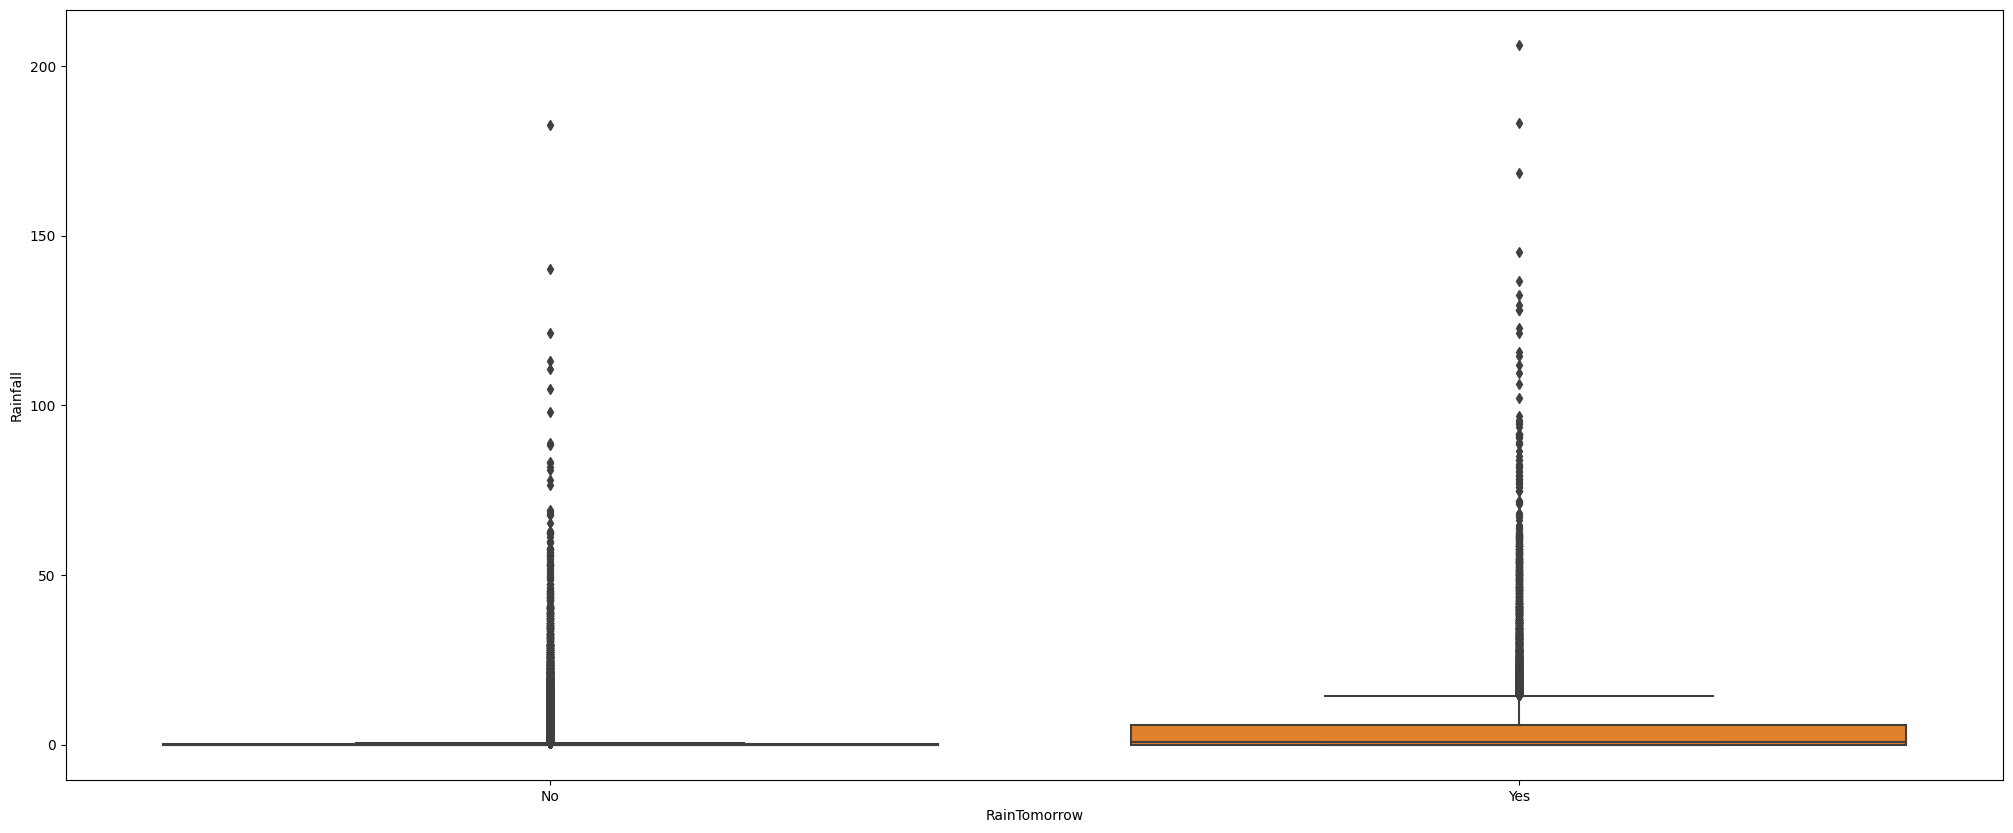

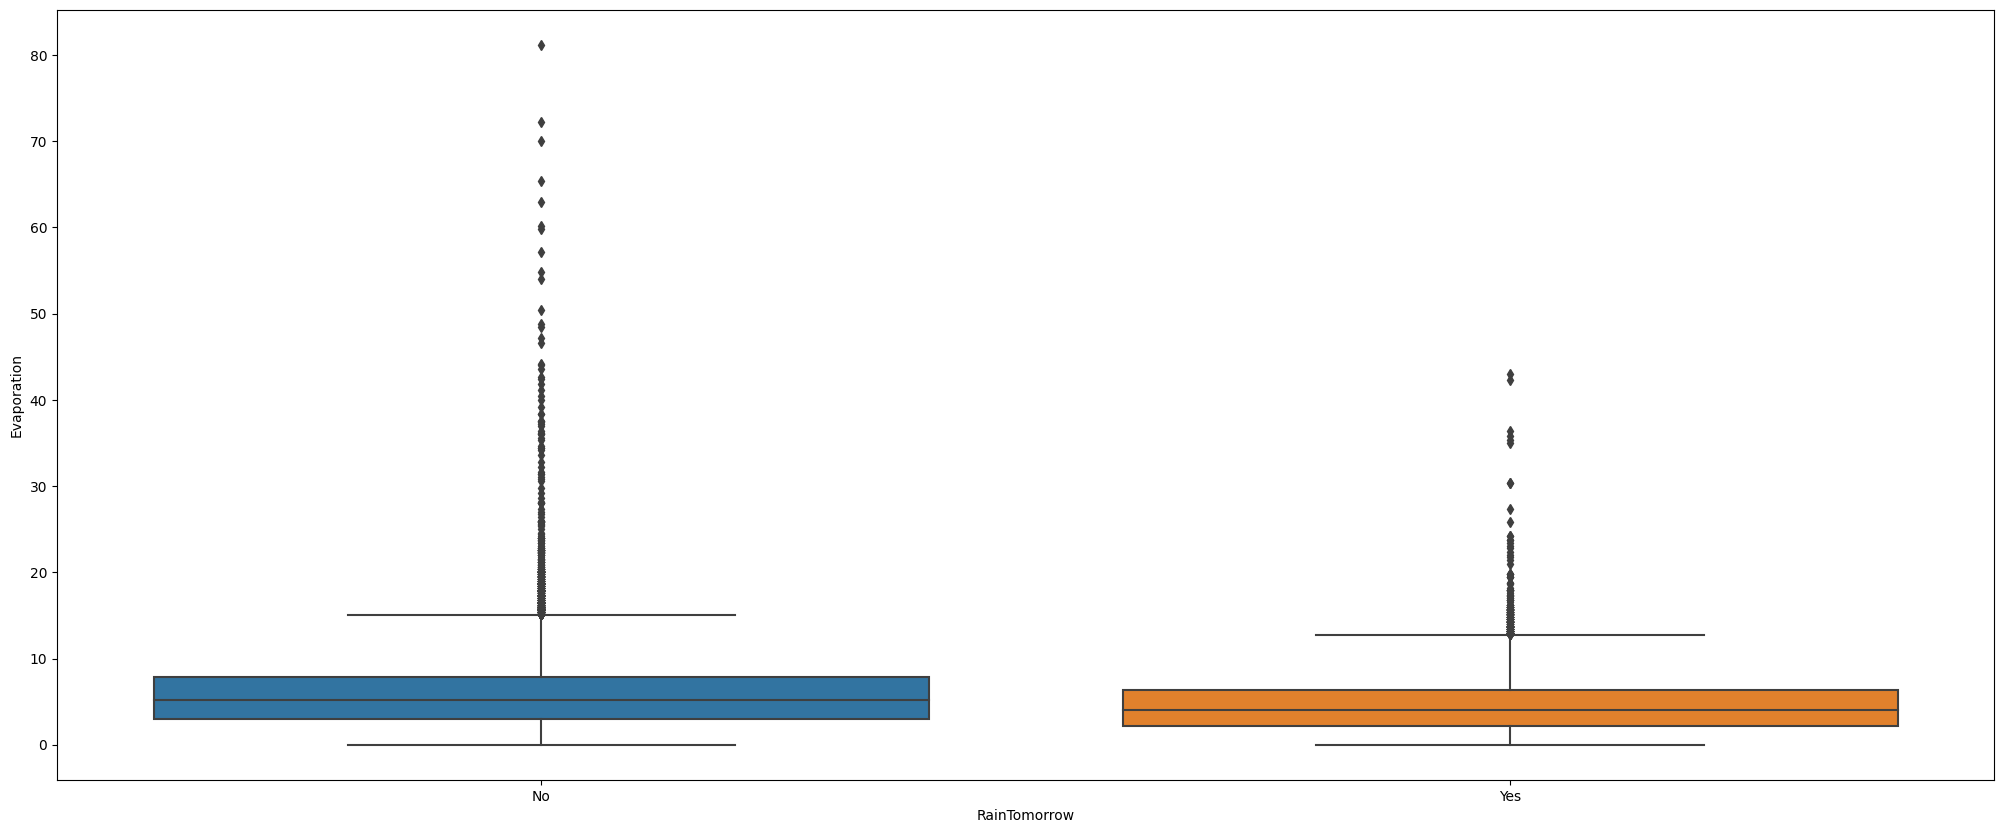

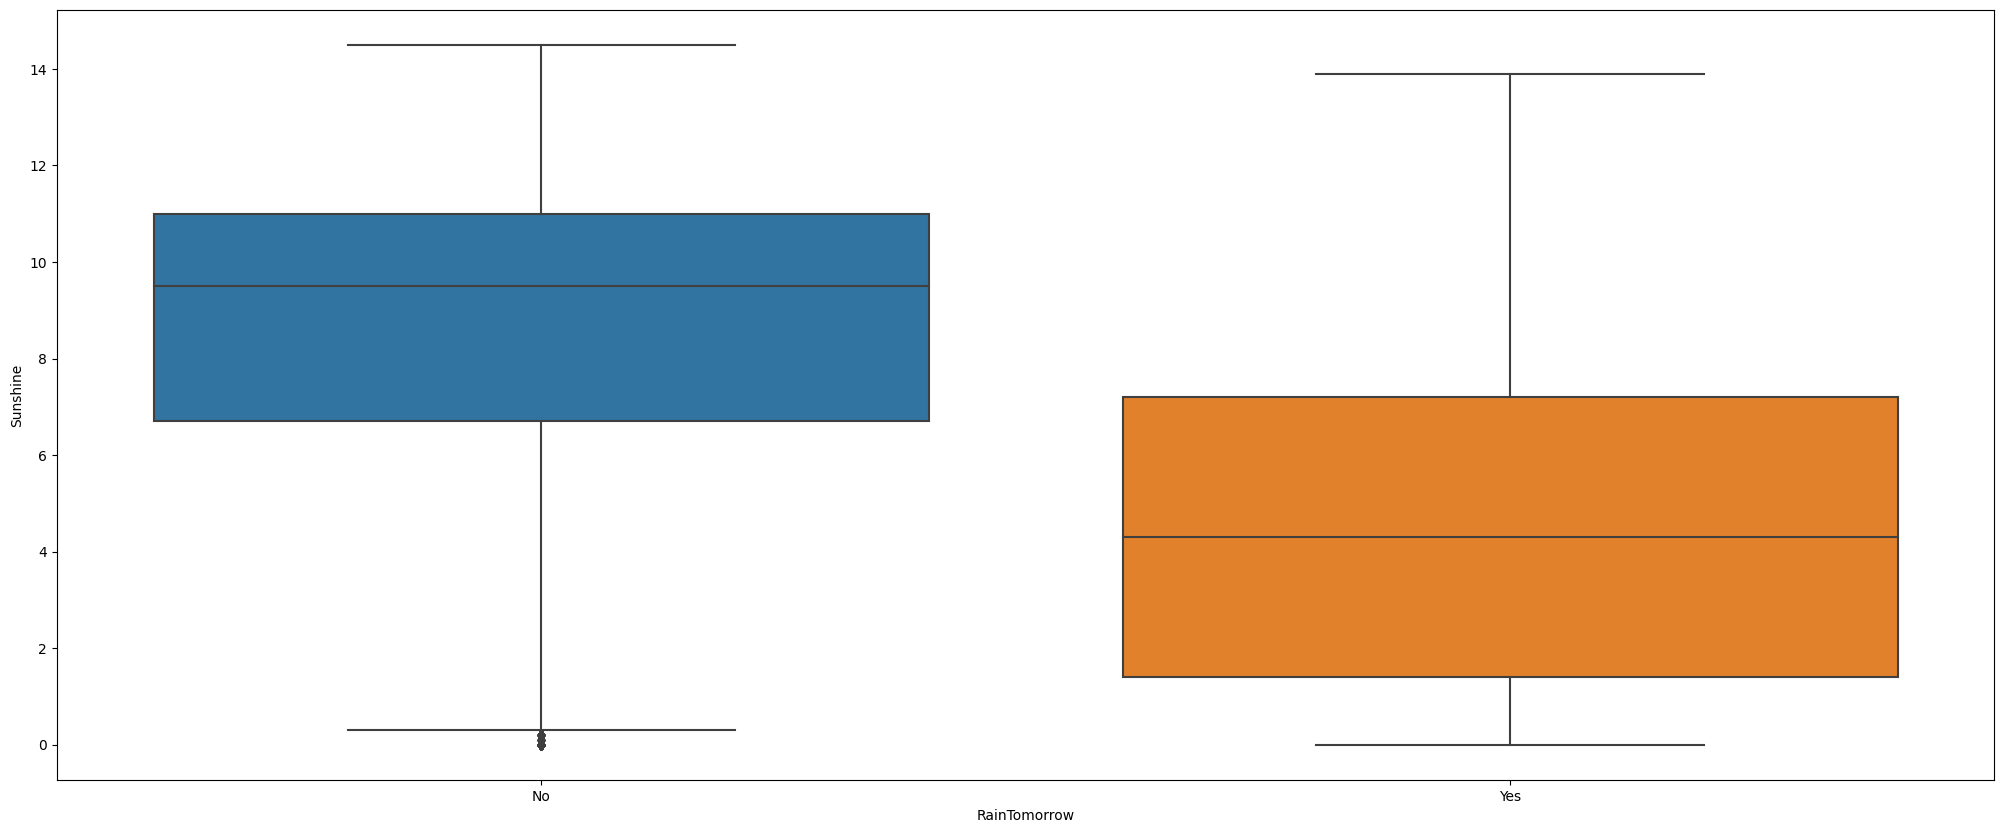

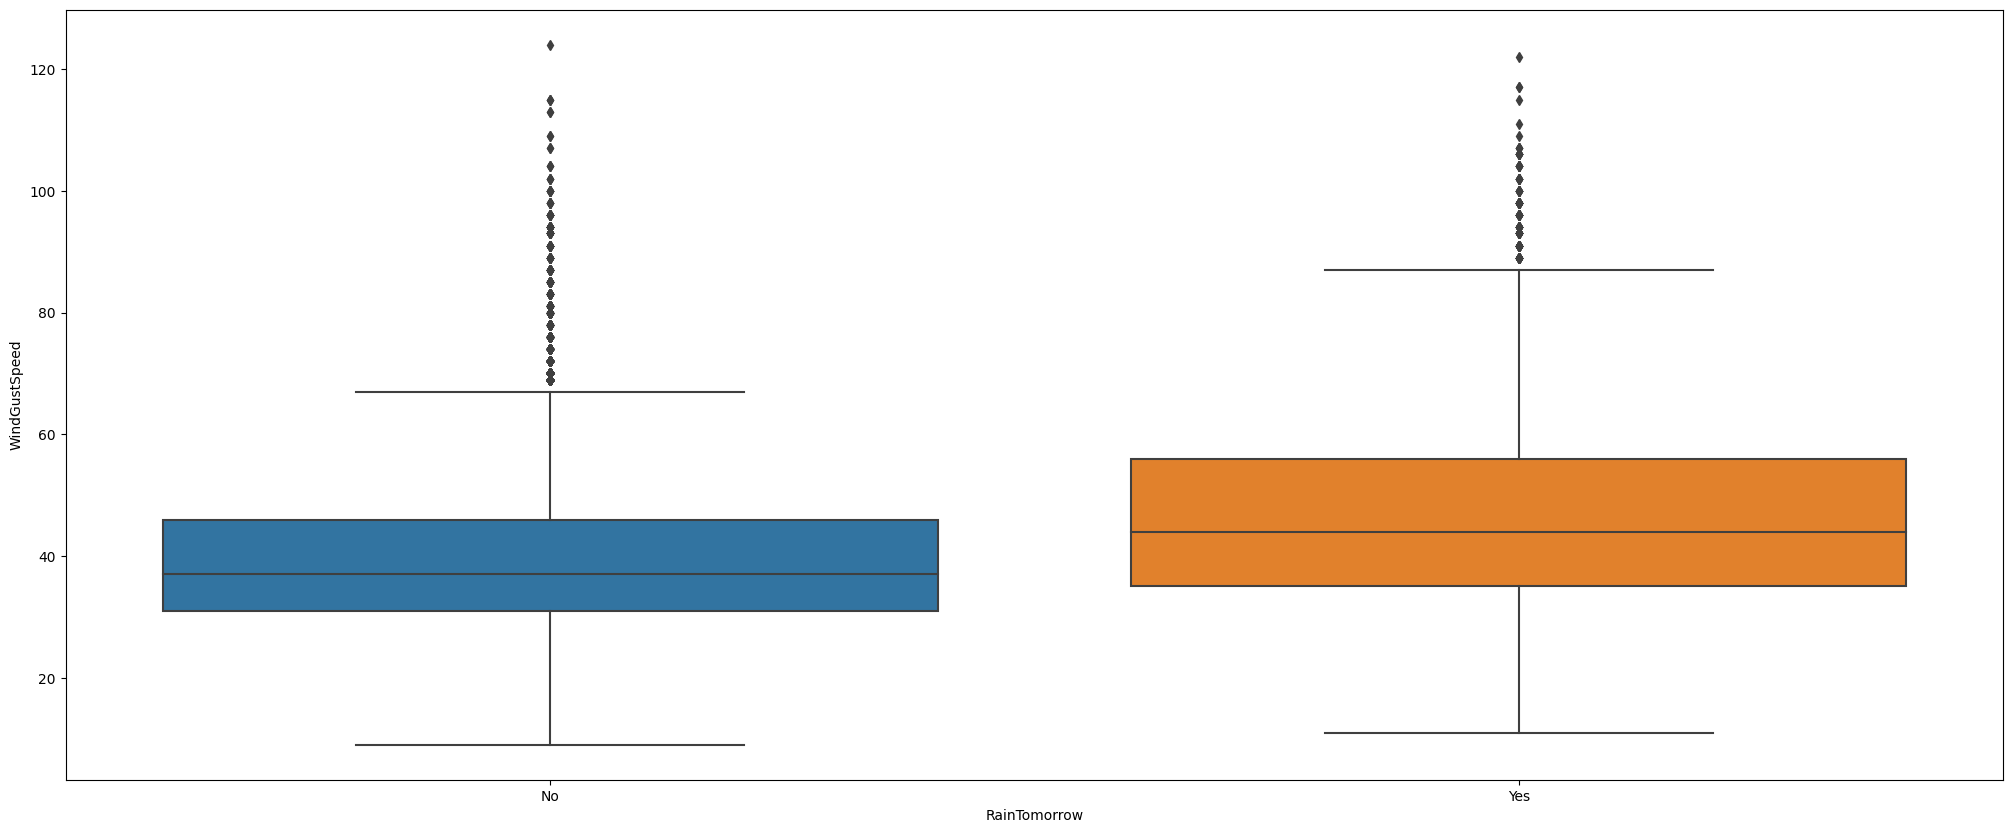

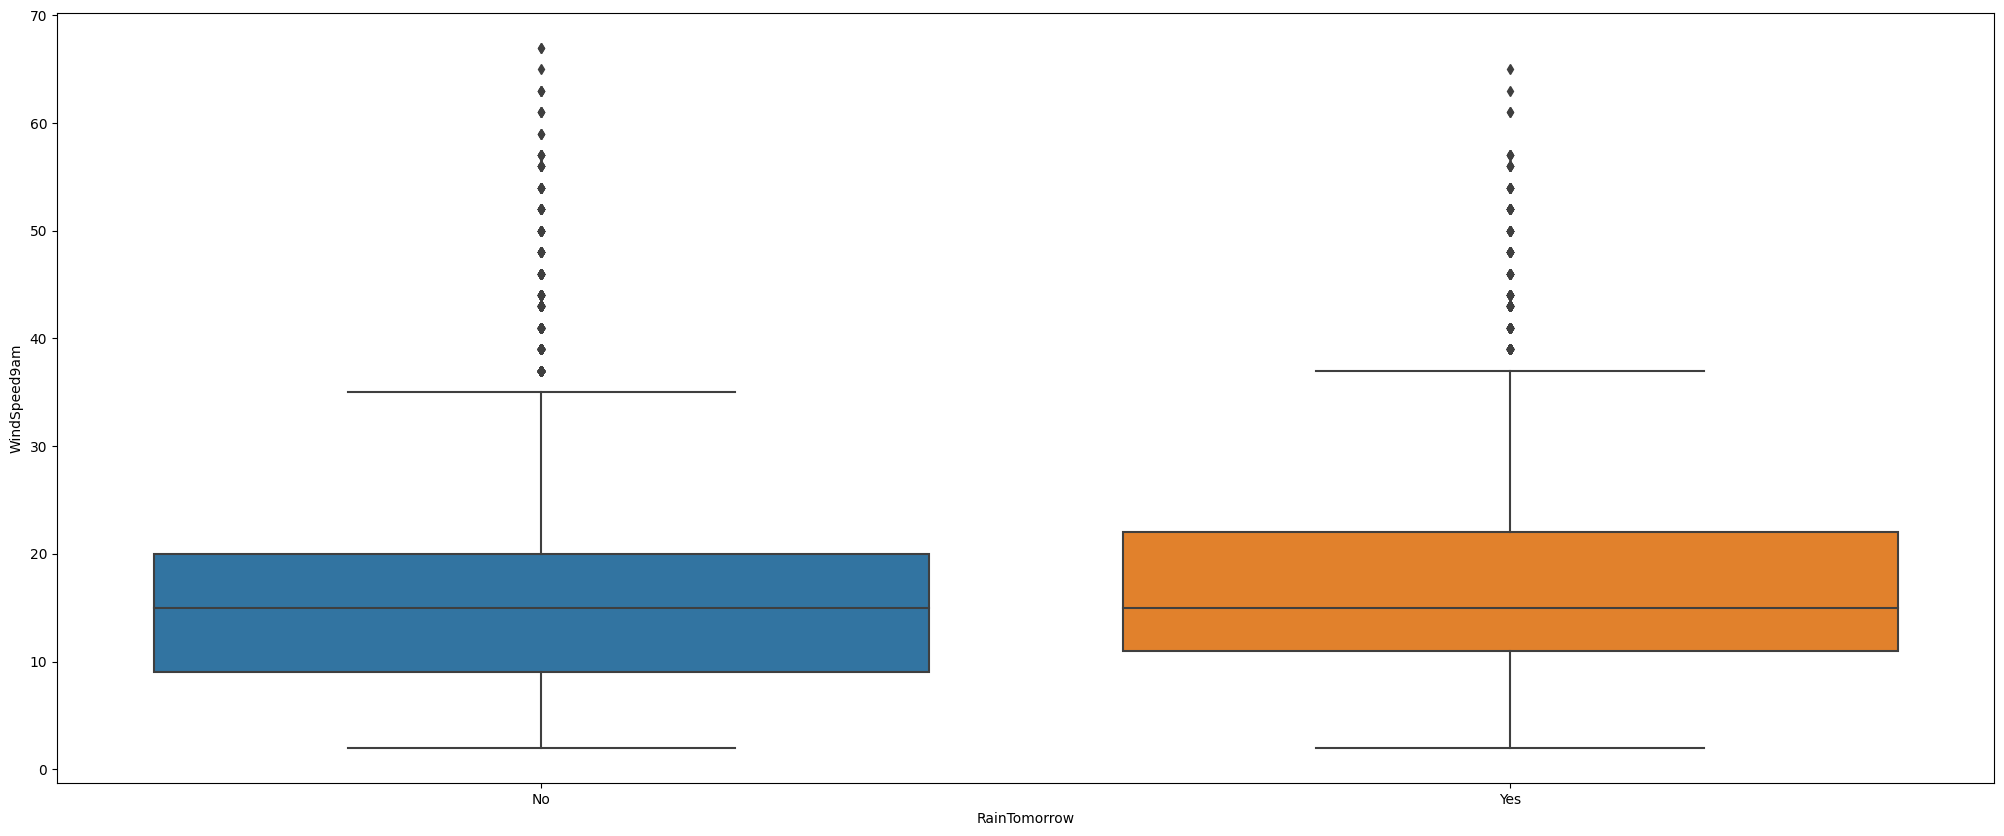

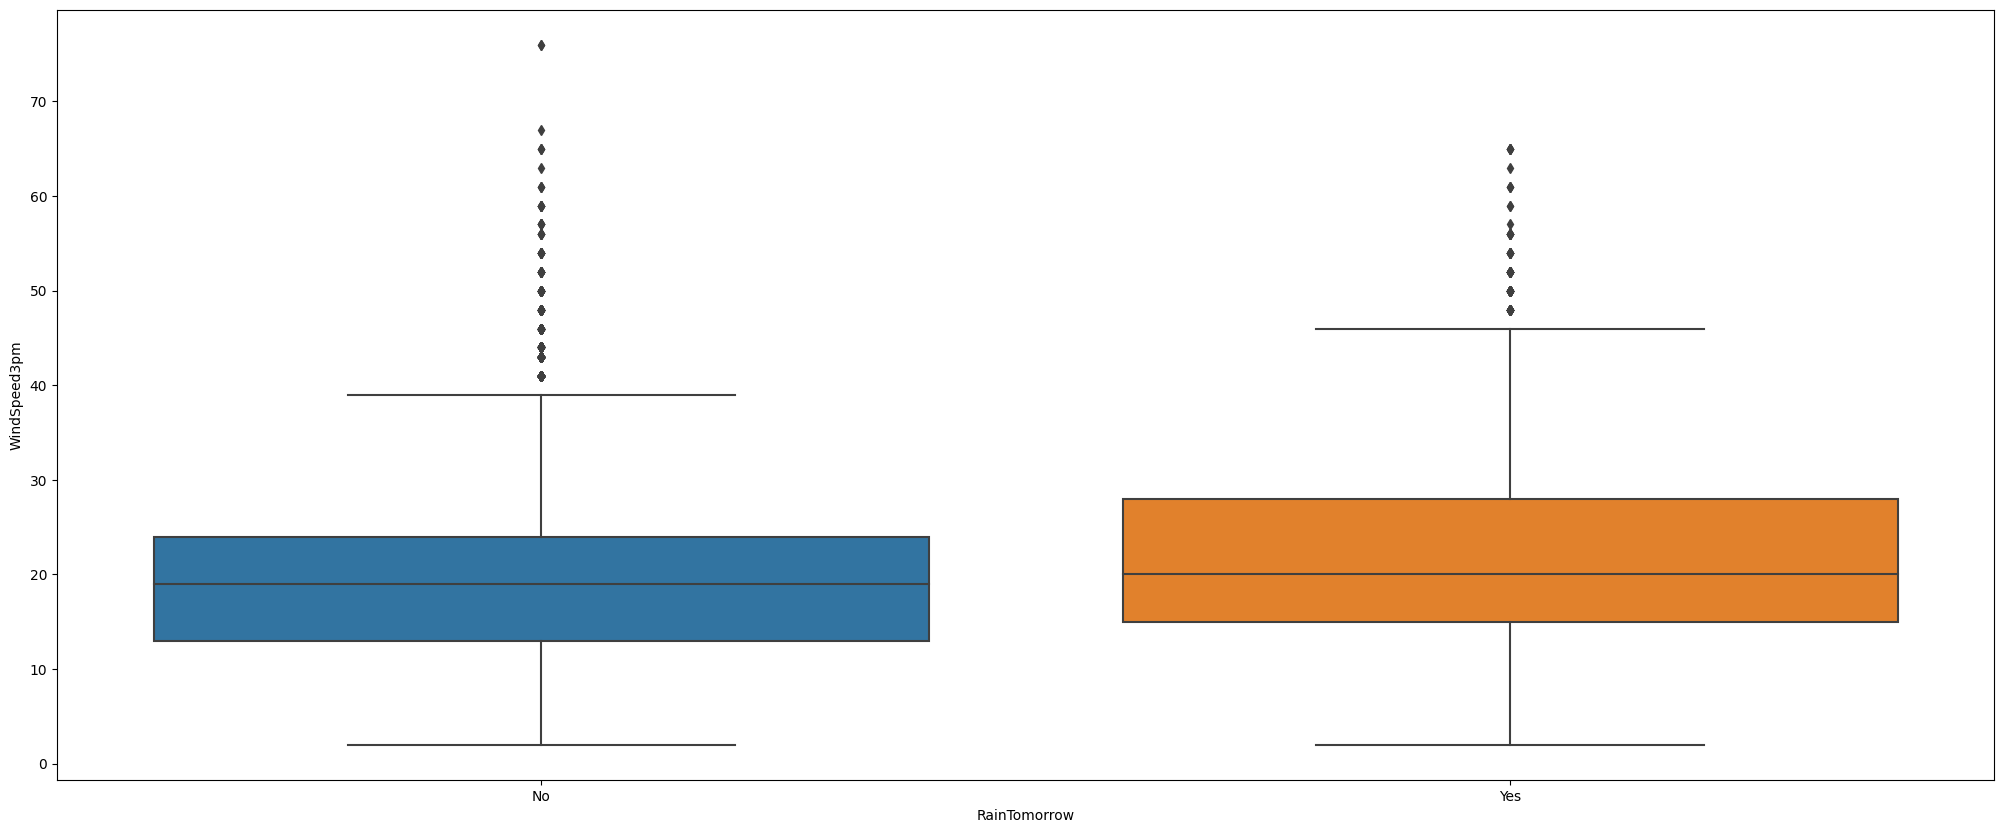

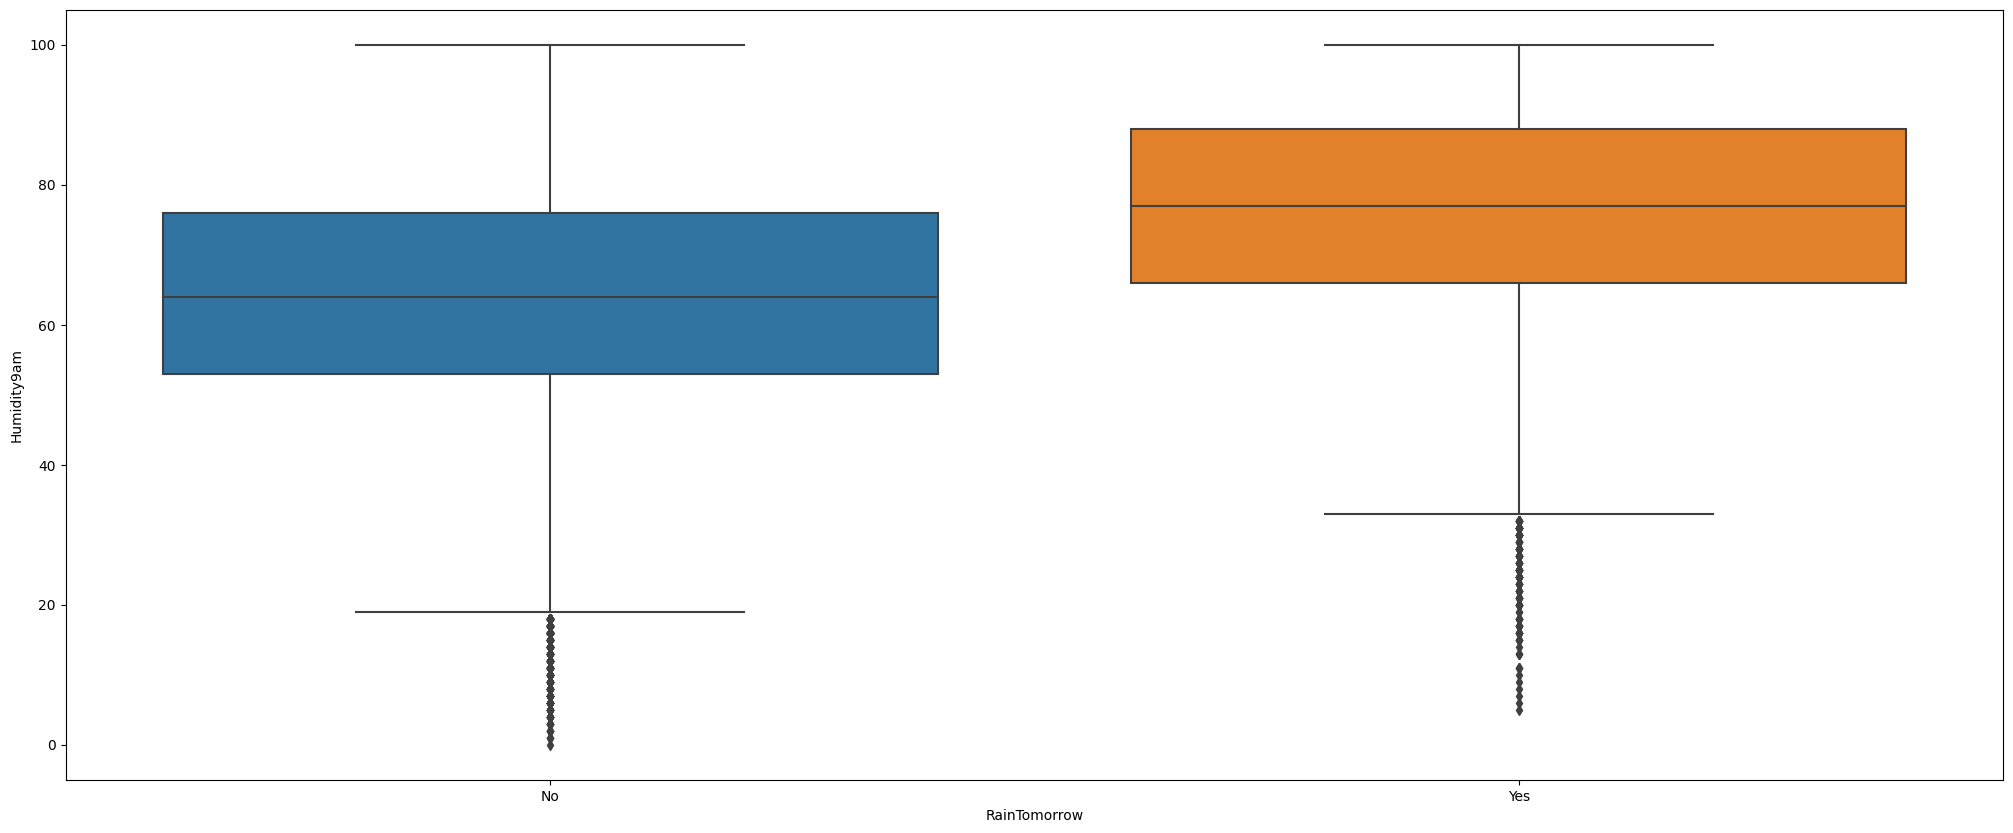

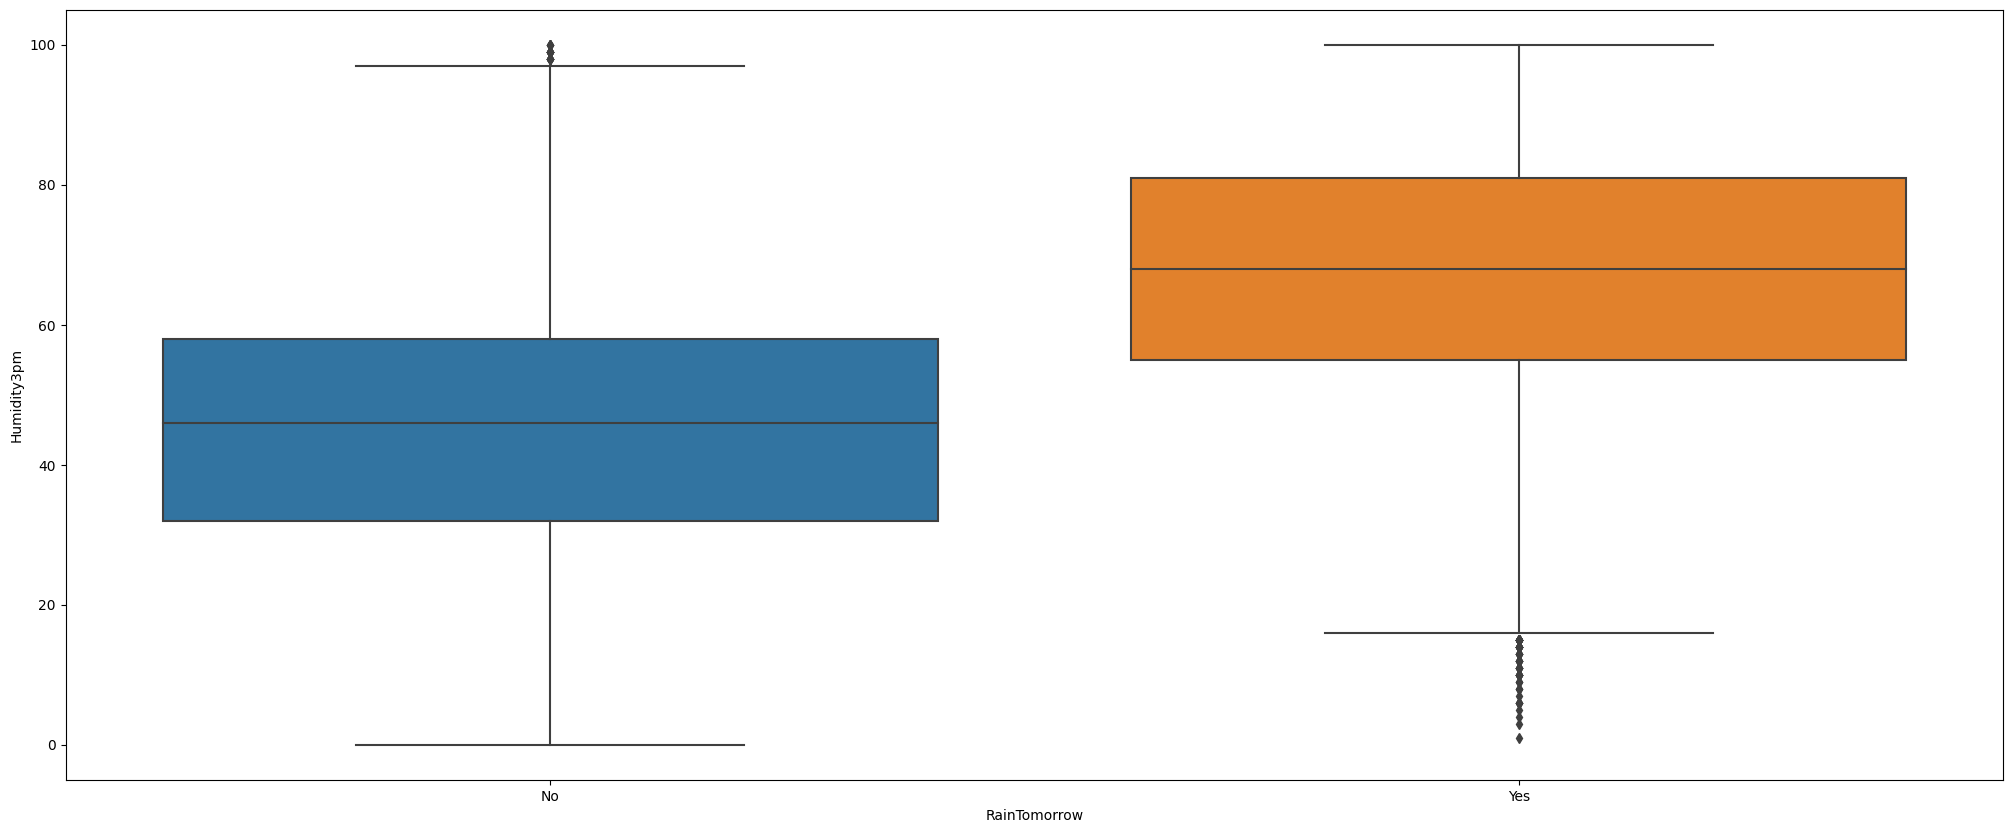

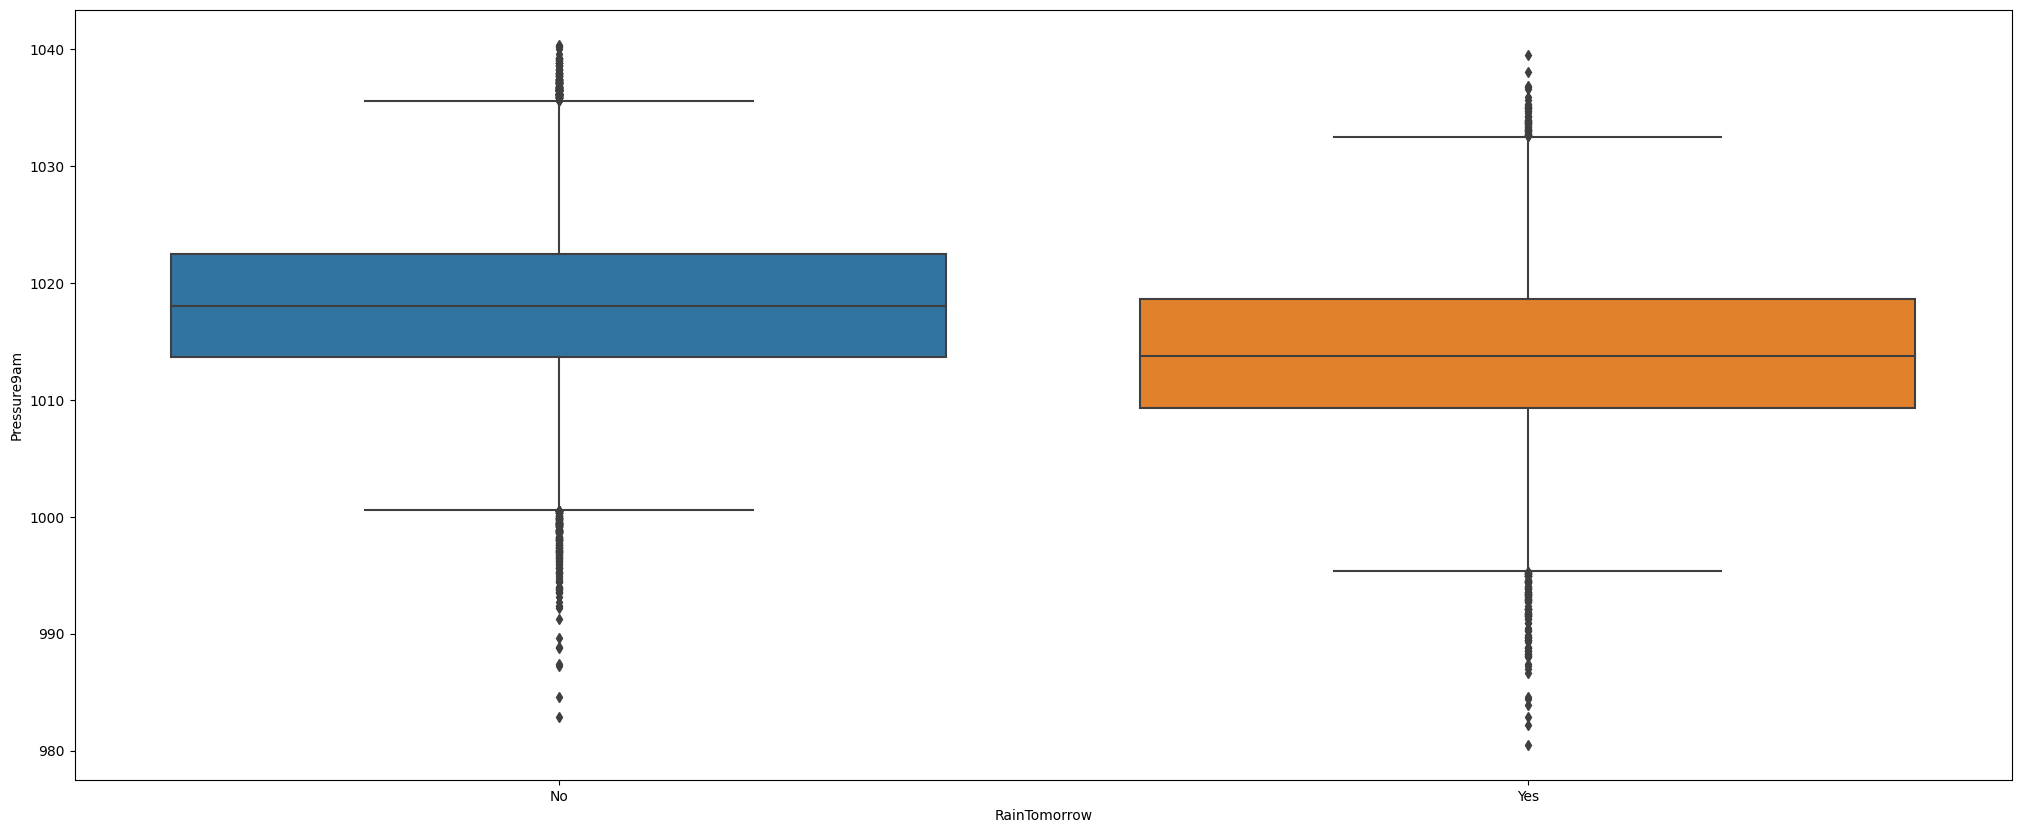

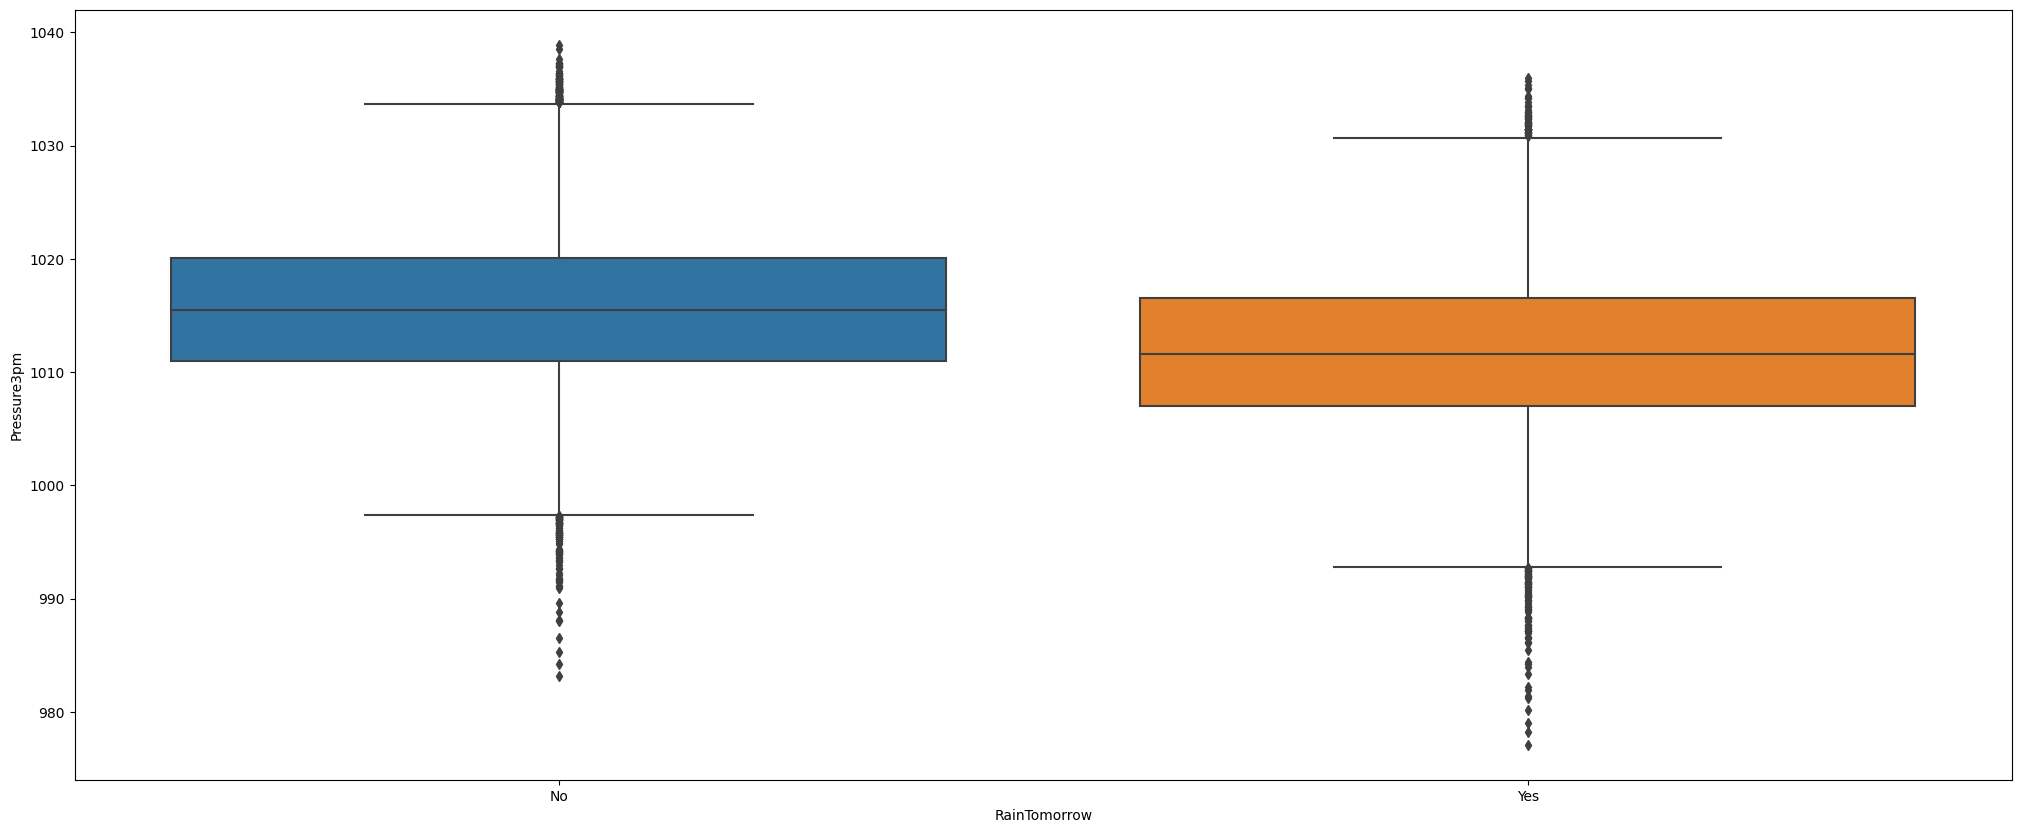

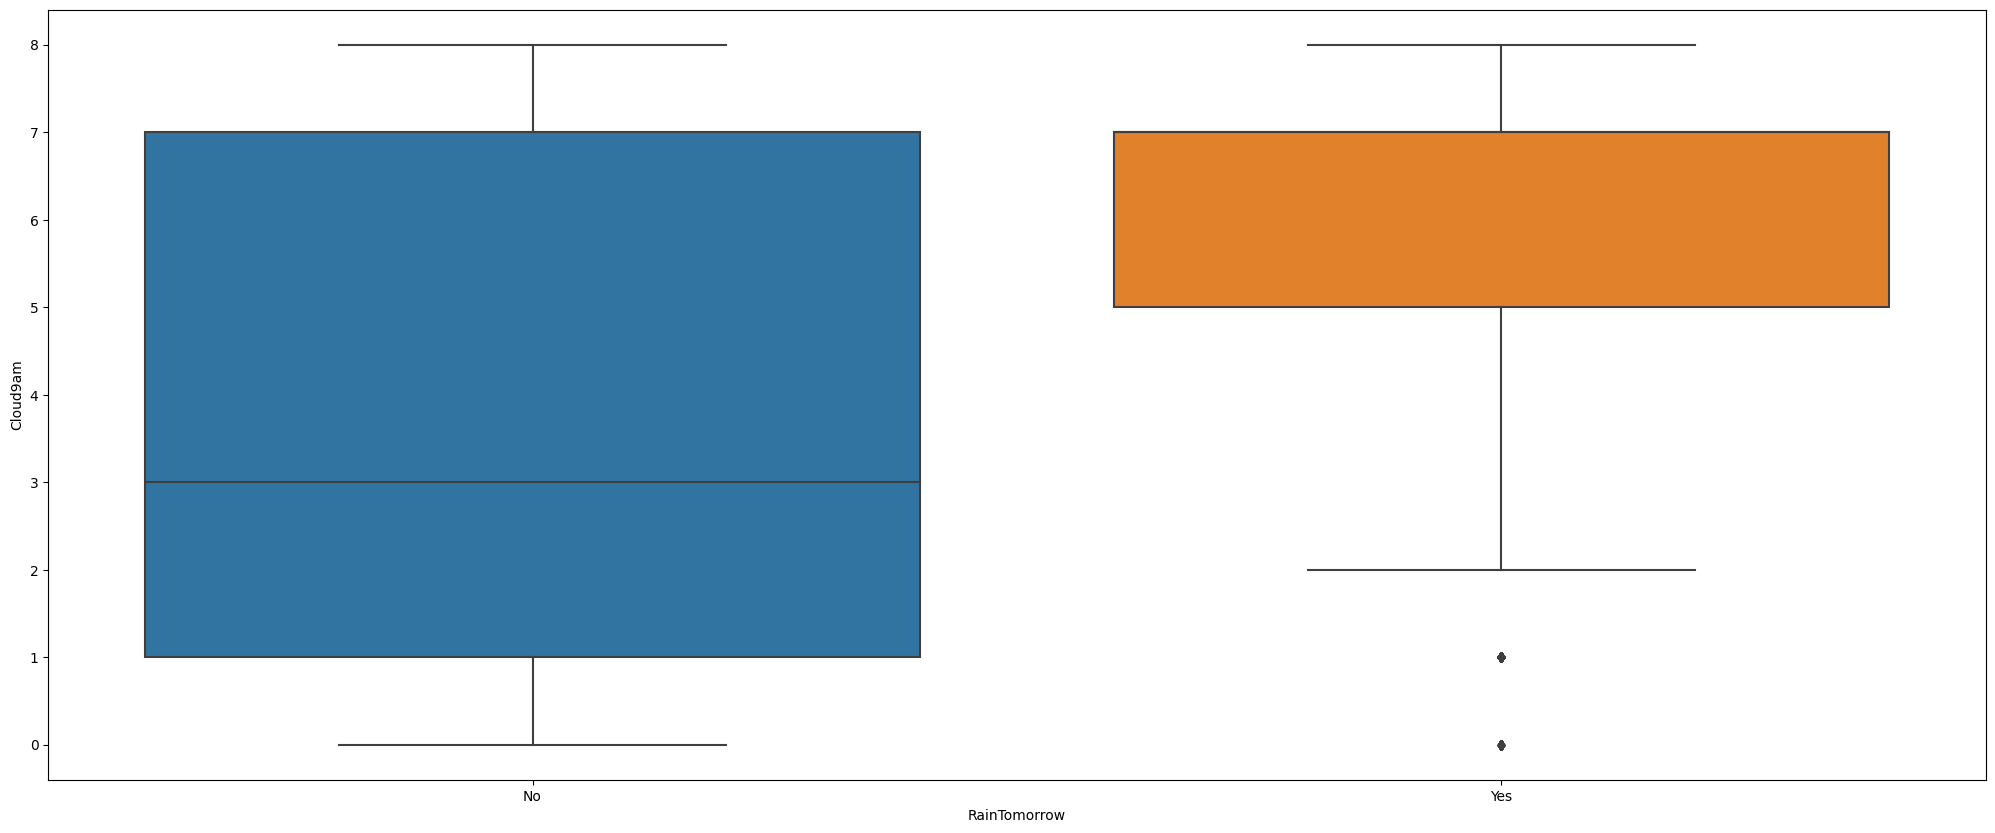

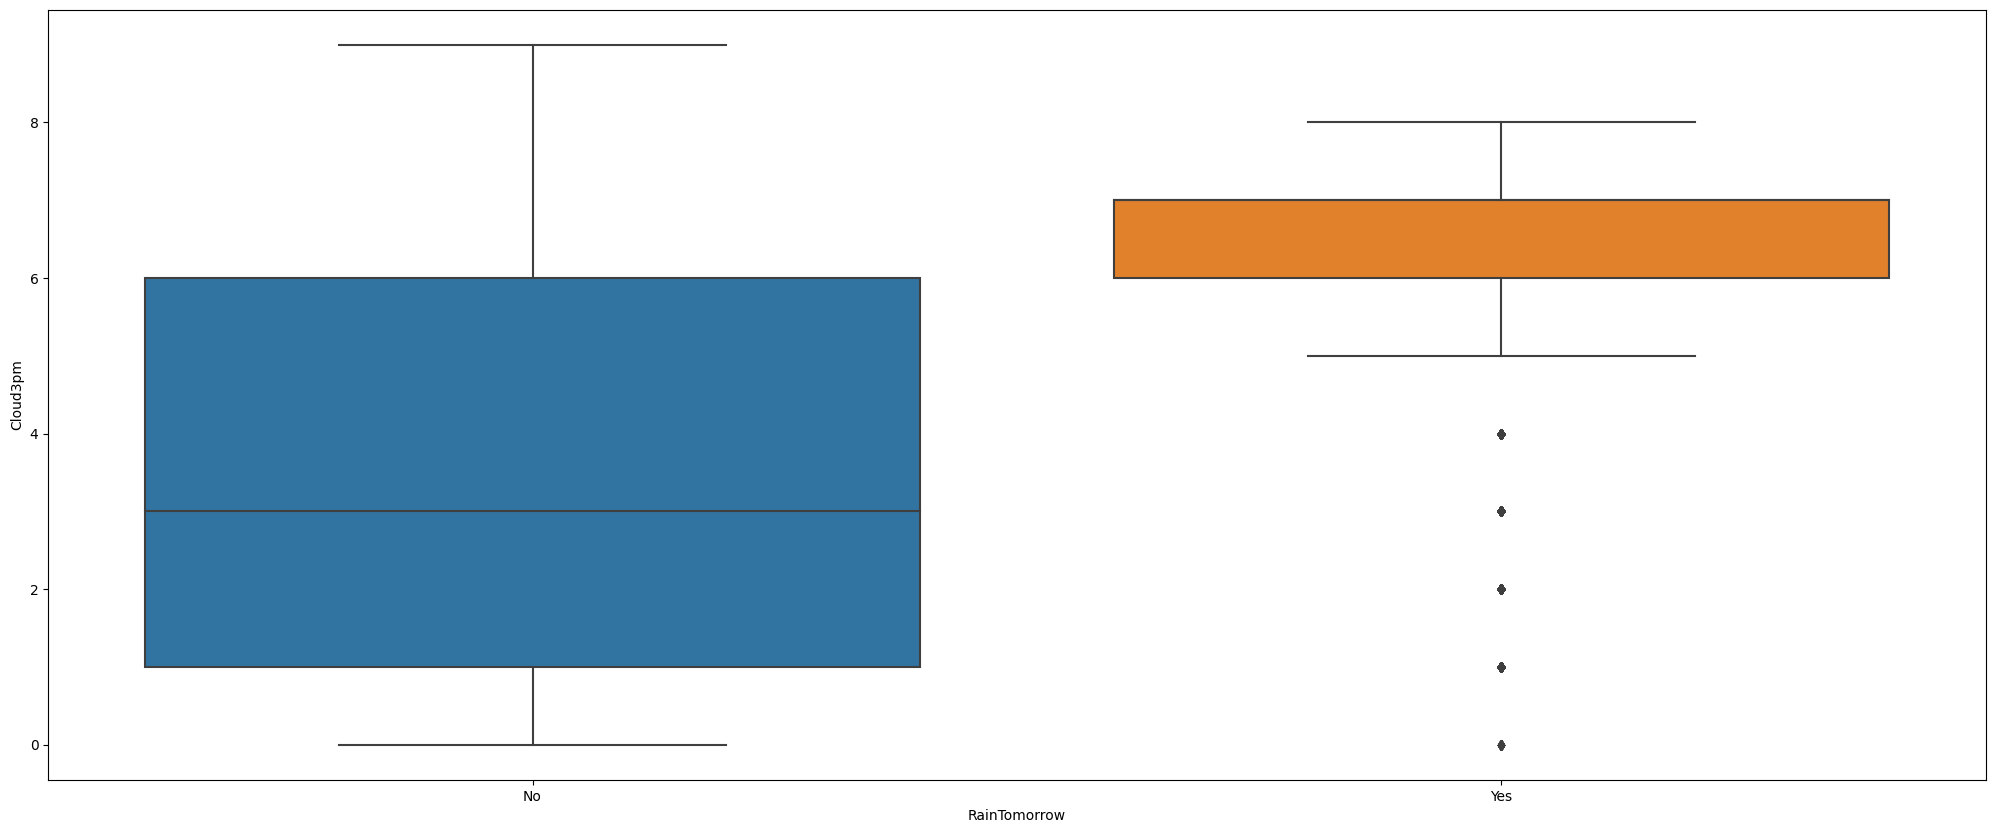

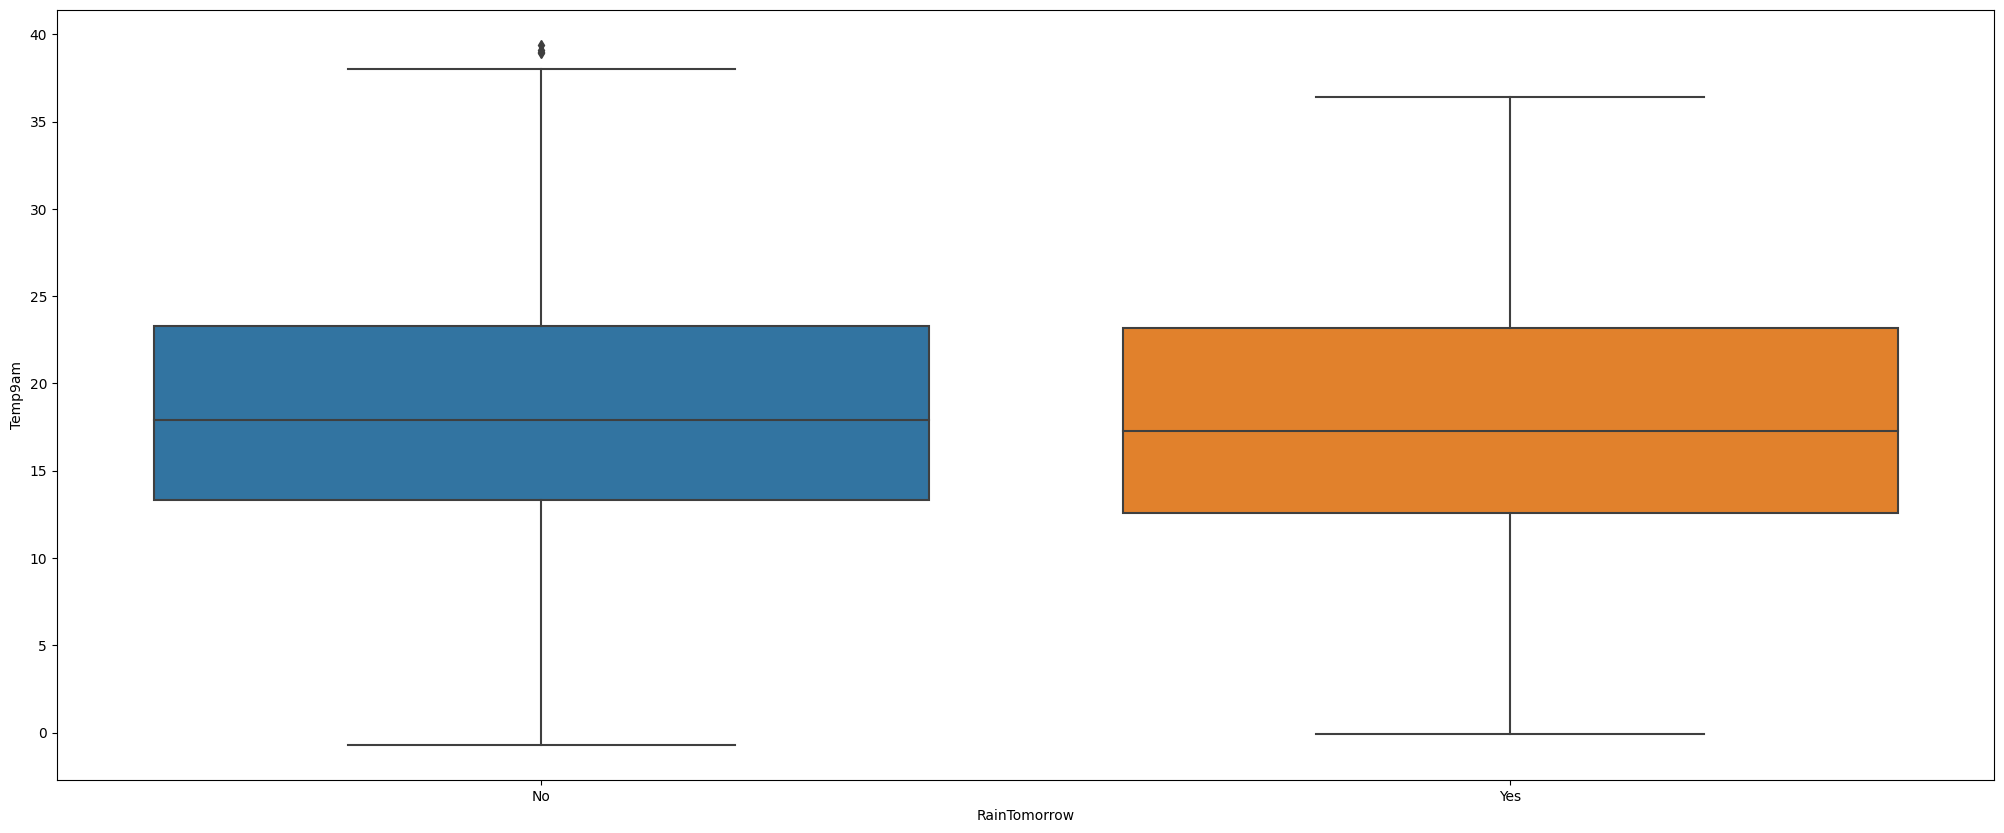

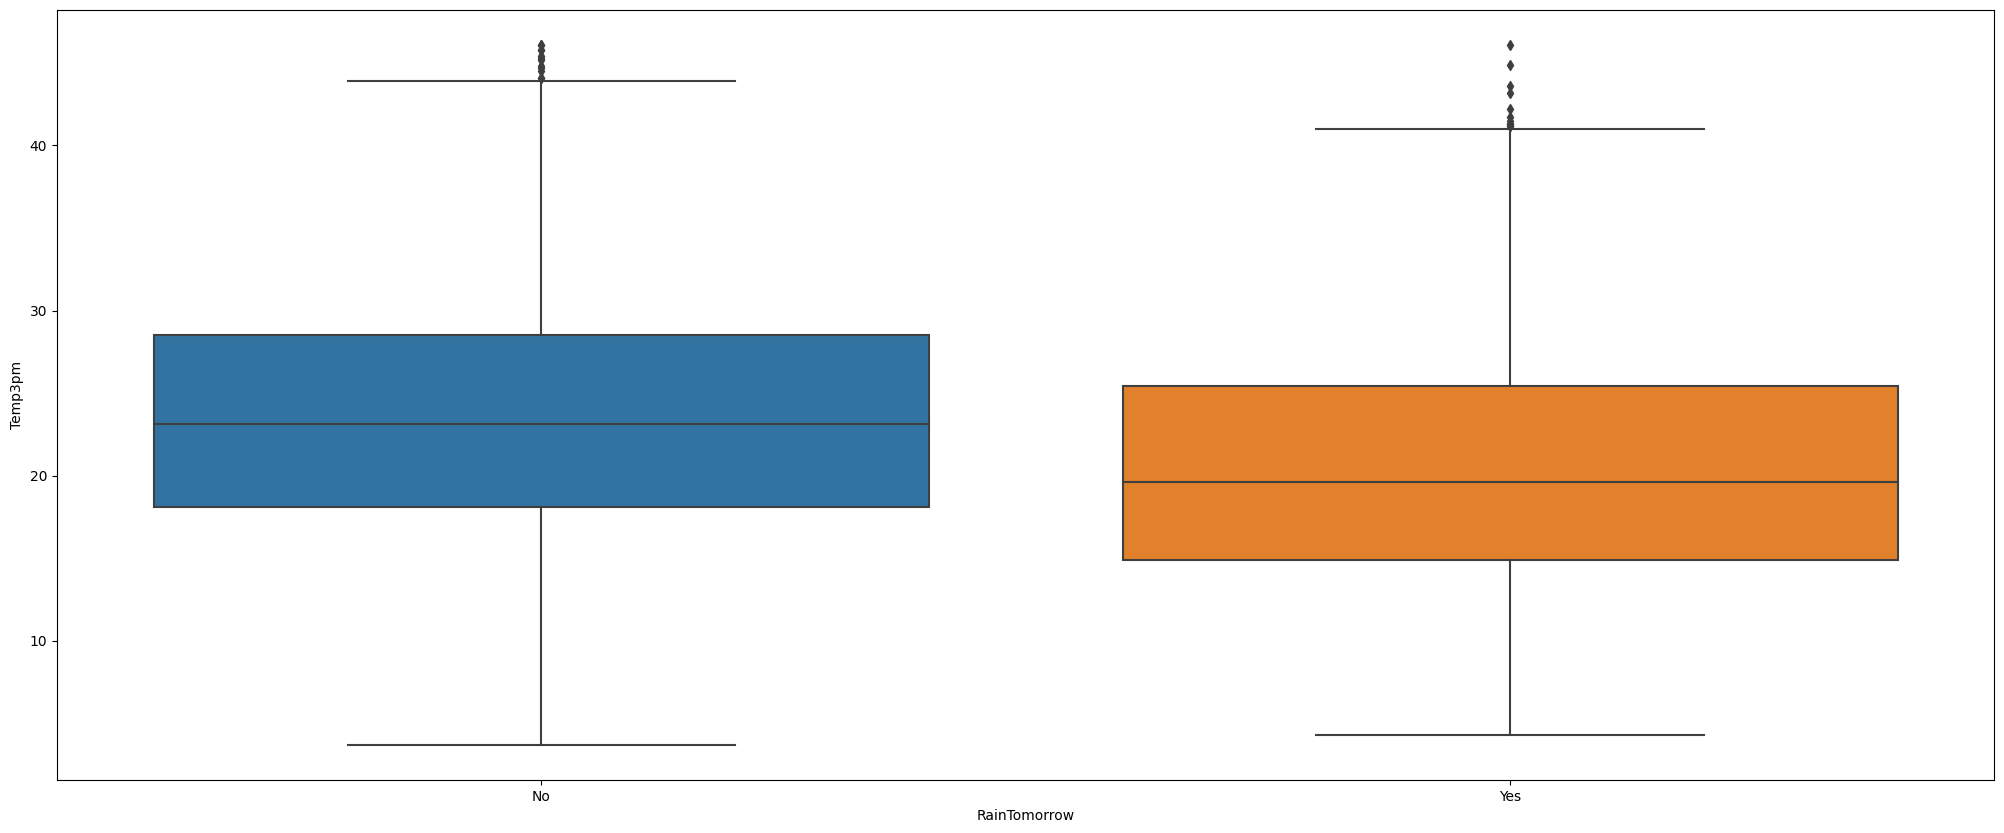

In [19]:
for i in float64:
    print(i)
    plt.subplots(figsize=(25,10))
    sns.boxplot(x="RainTomorrow", y=i, data=data)
#Evaporation, Sunshine, WindGustSpeed, Humidity9am, Humidity3pm, Cloud9am, Cloud3pm

In [20]:
data.shape

(56420, 25)

In [21]:
data.info

<bound method DataFrame.info of       Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0        Cobar     17.9     35.2       0.0         12.0      12.3         SSW   
1        Cobar     18.4     28.9       0.0         14.8      13.0           S   
2        Cobar     19.4     37.6       0.0         10.8      10.6         NNE   
3        Cobar     21.9     38.4       0.0         11.4      12.2         WNW   
4        Cobar     24.2     41.0       0.0         11.2       8.4         WNW   
...        ...      ...      ...       ...          ...       ...         ...   
56415   Darwin     19.3     33.4       0.0          6.0      11.0         ENE   
56416   Darwin     21.2     32.6       0.0          7.6       8.6           E   
56417   Darwin     20.7     32.8       0.0          5.6      11.0           E   
56418   Darwin     19.5     31.8       0.0          6.2      10.6         ESE   
56419   Darwin     20.2     31.7       0.0          5.6      10.7         ENE

In [22]:
data.Location.value_counts()

Darwin              3062
Perth               3025
Brisbane            2953
MelbourneAirport    2929
PerthAirport        2913
SydneyAirport       2870
Watsonia            2730
Mildura             2594
MountGambier        2465
NorfolkIsland       2464
Cairns              2444
Townsville          2419
WaggaWagga          2416
AliceSprings        2223
Nuriootpa           2008
Hobart              1939
Moree               1913
Melbourne           1898
Portland            1863
Woomera             1734
Sydney              1690
Sale                1678
CoffsHarbour        1380
Williamtown         1198
Canberra            1078
Cobar                534
Name: Location, dtype: int64

In [23]:
string = [var for var in data.columns if data[var].dtype=='O']
for i in string:
    print(i)
    print(data[i].value_counts())

Location
Darwin              3062
Perth               3025
Brisbane            2953
MelbourneAirport    2929
PerthAirport        2913
SydneyAirport       2870
Watsonia            2730
Mildura             2594
MountGambier        2465
NorfolkIsland       2464
Cairns              2444
Townsville          2419
WaggaWagga          2416
AliceSprings        2223
Nuriootpa           2008
Hobart              1939
Moree               1913
Melbourne           1898
Portland            1863
Woomera             1734
Sydney              1690
Sale                1678
CoffsHarbour        1380
Williamtown         1198
Canberra            1078
Cobar                534
Name: Location, dtype: int64
WindGustDir
E      4516
N      4210
W      4161
SW     4052
ENE    4028
SE     3930
SSW    3898
WSW    3791
S      3636
ESE    3312
SSE    3295
NE     3185
WNW    2989
NW     2612
NNE    2516
NNW    2289
Name: WindGustDir, dtype: int64
WindDir9am
N      4967
E      4456
ENE    3932
SSE    3893
SE     3880
W    

Text(0, 0.5, 'WindSpeed3pm')

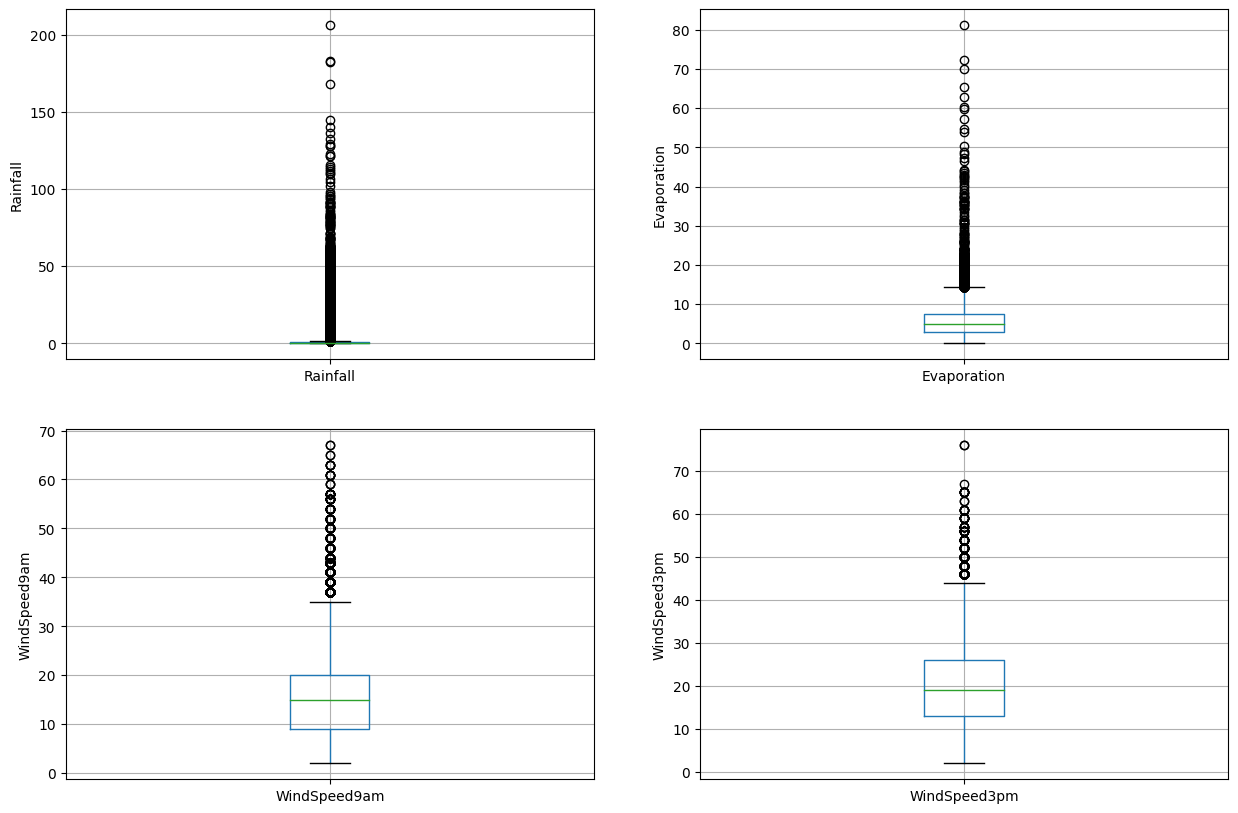

In [24]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = data.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = data.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = data.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = data.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

Text(0, 0.5, 'RainTomorrow')

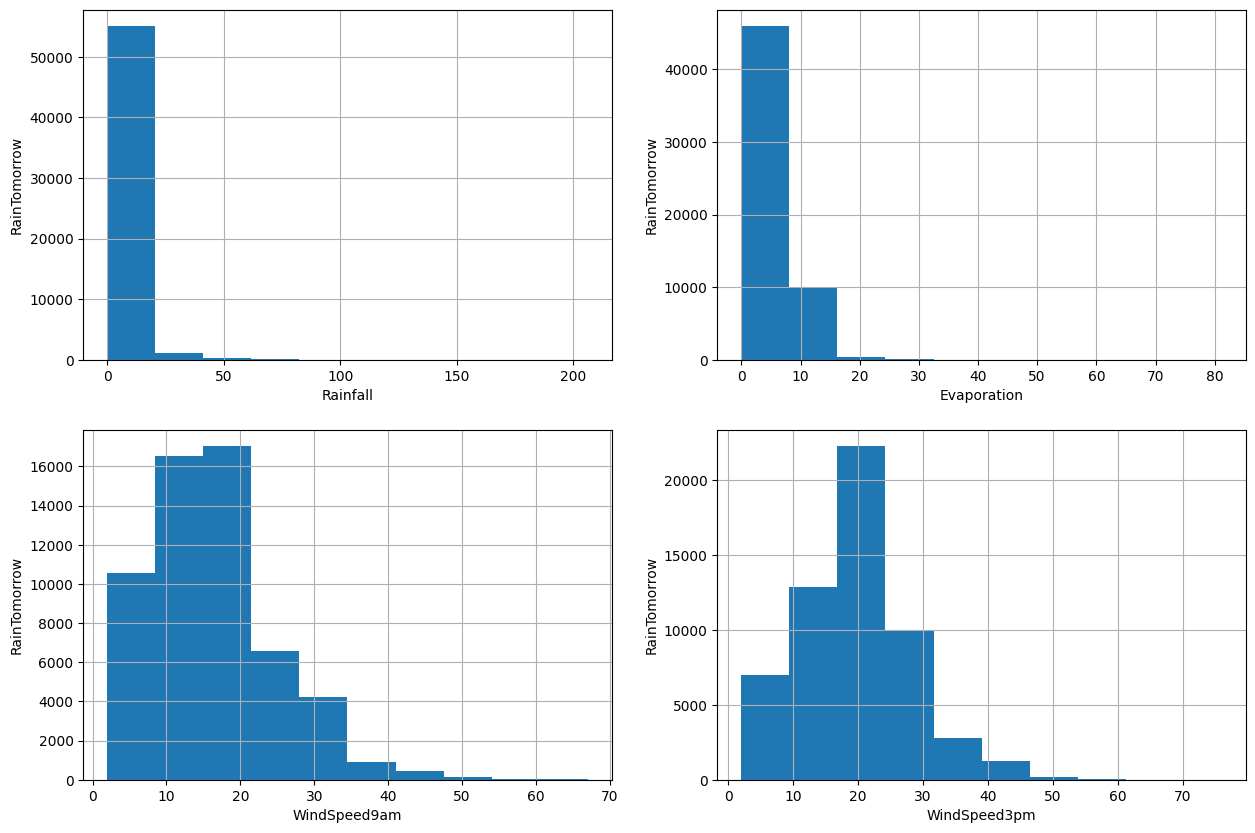

In [25]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = data.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = data.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = data.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = data.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

In [26]:
IQR = data.Rainfall.quantile(0.75) - data.Rainfall.quantile(0.25)
Lower_fence = data.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = data.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -1.7999999999999998 or > 2.4


In [27]:
data

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0        Cobar     17.9     35.2       0.0         12.0      12.3         SSW   
1        Cobar     18.4     28.9       0.0         14.8      13.0           S   
2        Cobar     19.4     37.6       0.0         10.8      10.6         NNE   
3        Cobar     21.9     38.4       0.0         11.4      12.2         WNW   
4        Cobar     24.2     41.0       0.0         11.2       8.4         WNW   
...        ...      ...      ...       ...          ...       ...         ...   
56415   Darwin     19.3     33.4       0.0          6.0      11.0         ENE   
56416   Darwin     21.2     32.6       0.0          7.6       8.6           E   
56417   Darwin     20.7     32.8       0.0          5.6      11.0           E   
56418   Darwin     19.5     31.8       0.0          6.2      10.6         ESE   
56419   Darwin     20.2     31.7       0.0          5.6      10.7         ENE   

       WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  \
0               48.0        ENE         SW  ...       1004.4       2.0   
1               37.0        SSE        SSE  ...       1012.1       1.0   
2               46.0        NNE        NNW  ...       1009.2       1.0   
3               31.0        WNW        WSW  ...       1009.1       1.0   
4               35.0         NW        WNW  ...       1007.4       1.0   
...              ...        ...        ...  ...          ...       ...   
56415           35.0         SE         NE  ...       1010.5       0.0   
56416           37.0         SE         SE  ...       1011.2       7.0   
56417           33.0          E          W  ...       1011.8       0.0   
56418           26.0         SE        NNW  ...       1010.7       1.0   
56419           30.0        ENE        NNW  ...       1009.7       6.0   

       Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Year  Month  Day  
0           5.0     26.6     33.4         No            No  2009      1    1  
1           1.0     20.3     27.0         No            No  2009      1    2  
2           6.0     28.7     34.9         No            No  2009      1    4  
3           5.0     29.1     35.6         No            No  2009      1    5  
4           6.0     33.6     37.6         No            No  2009      1    6  
...         ...      ...      ...        ...           ...   ...    ...  ...  
56415       1.0     24.5     32.3         No            No  2017      6   20  
56416       0.0     24.8     32.0         No            No  2017      6   21  
56417       0.0     24.8     32.1         No            No  2017      6   22  
56418       1.0     24.8     29.2         No            No  2017      6   23  
56419       5.0     25.4     31.0         No            No  2017      6   24  

[56420 rows x 25 columns]

In [28]:
for i in float64:
    IQR = data[i].quantile(0.75) - data[i].quantile(0.25)
    Lower_fence = data[i].quantile(0.25) - (IQR * 3)
    Upper_fence = data[i].quantile(0.75) + (IQR * 3)
    print(i+'outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


MinTempoutliers are values < -20.799999999999997 or > 47.8
MaxTempoutliers are values < -14.3 or > 62.7
Rainfalloutliers are values < -1.7999999999999998 or > 2.4
Evaporationoutliers are values < -11.0 or > 21.200000000000003
Sunshineoutliers are values < -12.099999999999998 or > 27.799999999999997
WindGustSpeedoutliers are values < -20.0 or > 99.0
WindSpeed9amoutliers are values < -24.0 or > 53.0
WindSpeed3pmoutliers are values < -26.0 or > 65.0
Humidity9amoutliers are values < -17.0 or > 151.0
Humidity3pmoutliers are values < -49.0 or > 147.0
Pressure9amoutliers are values < 985.4000000000003 or > 1049.0999999999997
Pressure3pmoutliers are values < 982.2000000000002 or > 1047.2999999999997
Cloud9amoutliers are values < -17.0 or > 25.0
Cloud3pmoutliers are values < -13.0 or > 22.0
Temp9amoutliers are values < -17.5 or > 53.900000000000006
Temp3pmoutliers are values < -14.100000000000001 or > 59.4


In [29]:
for i in float64:
    IQR = data[i].quantile(0.75) - data[i].quantile(0.25)
    Lower_fence = data[i].quantile(0.25) - (IQR * 3)
    Upper_fence = data[i].quantile(0.75) + (IQR * 3)
    print(i+'outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))
    for j in range(0, len(data[i])):
        if data[i][j] < Lower_fence:
            data[i][j] = data[i].quantile(0.50)
        elif data[i][j] > Upper_fence:
            data[i][j] = data[i].quantile(0.50)

MinTempoutliers are values < -20.799999999999997 or > 47.8
MaxTempoutliers are values < -14.3 or > 62.7
Rainfalloutliers are values < -1.7999999999999998 or > 2.4


C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

Evaporationoutliers are values < -11.0 or > 21.200000000000003


C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

Sunshineoutliers are values < -12.099999999999998 or > 27.799999999999997
WindGustSpeedoutliers are values < -20.0 or > 99.0


C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

WindSpeed9amoutliers are values < -24.0 or > 53.0


C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

WindSpeed3pmoutliers are values < -26.0 or > 65.0


C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quan

Humidity9amoutliers are values < -17.0 or > 151.0
Humidity3pmoutliers are values < -49.0 or > 147.0
Pressure9amoutliers are values < 985.4000000000003 or > 1049.0999999999997


C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantil

Pressure3pmoutliers are values < 982.2000000000002 or > 1047.2999999999997


C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantile(0.50)
C:\Users\cspde\AppData\Local\Temp\ipykernel_29260\4269654827.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].quantil

Cloud9amoutliers are values < -17.0 or > 25.0
Cloud3pmoutliers are values < -13.0 or > 22.0
Temp9amoutliers are values < -17.5 or > 53.900000000000006
Temp3pmoutliers are values < -14.100000000000001 or > 59.4


In [30]:
data

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0        Cobar     17.9     35.2       0.0         12.0      12.3         SSW   
1        Cobar     18.4     28.9       0.0         14.8      13.0           S   
2        Cobar     19.4     37.6       0.0         10.8      10.6         NNE   
3        Cobar     21.9     38.4       0.0         11.4      12.2         WNW   
4        Cobar     24.2     41.0       0.0         11.2       8.4         WNW   
...        ...      ...      ...       ...          ...       ...         ...   
56415   Darwin     19.3     33.4       0.0          6.0      11.0         ENE   
56416   Darwin     21.2     32.6       0.0          7.6       8.6           E   
56417   Darwin     20.7     32.8       0.0          5.6      11.0           E   
56418   Darwin     19.5     31.8       0.0          6.2      10.6         ESE   
56419   Darwin     20.2     31.7       0.0          5.6      10.7         ENE   

       WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  \
0               48.0        ENE         SW  ...       1004.4       2.0   
1               37.0        SSE        SSE  ...       1012.1       1.0   
2               46.0        NNE        NNW  ...       1009.2       1.0   
3               31.0        WNW        WSW  ...       1009.1       1.0   
4               35.0         NW        WNW  ...       1007.4       1.0   
...              ...        ...        ...  ...          ...       ...   
56415           35.0         SE         NE  ...       1010.5       0.0   
56416           37.0         SE         SE  ...       1011.2       7.0   
56417           33.0          E          W  ...       1011.8       0.0   
56418           26.0         SE        NNW  ...       1010.7       1.0   
56419           30.0        ENE        NNW  ...       1009.7       6.0   

       Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Year  Month  Day  
0           5.0     26.6     33.4         No            No  2009      1    1  
1           1.0     20.3     27.0         No            No  2009      1    2  
2           6.0     28.7     34.9         No            No  2009      1    4  
3           5.0     29.1     35.6         No            No  2009      1    5  
4           6.0     33.6     37.6         No            No  2009      1    6  
...         ...      ...      ...        ...           ...   ...    ...  ...  
56415       1.0     24.5     32.3         No            No  2017      6   20  
56416       0.0     24.8     32.0         No            No  2017      6   21  
56417       0.0     24.8     32.1         No            No  2017      6   22  
56418       1.0     24.8     29.2         No            No  2017      6   23  
56419       5.0     25.4     31.0         No            No  2017      6   24  

[56420 rows x 25 columns]

In [31]:
for i in float64:
    median = data[i].quantile(0.50)
    std = data[i].std()
    outliers = (data[i] - median).abs() > std
    data2 = data.replace(outliers, np.nan)
    print(outliers)
    data[i].fillna(median, inplace=True)

0        False
1        False
2        False
3         True
4         True
         ...  
56415    False
56416     True
56417     True
56418    False
56419     True
Name: MinTemp, Length: 56420, dtype: bool
0         True
1        False
2         True
3         True
4         True
         ...  
56415     True
56416     True
56417     True
56418     True
56419     True
Name: MaxTemp, Length: 56420, dtype: bool
0        False
1        False
2        False
3        False
4        False
         ...  
56415    False
56416    False
56417    False
56418    False
56419    False
Name: Rainfall, Length: 56420, dtype: bool
0         True
1         True
2         True
3         True
4         True
         ...  
56415    False
56416    False
56417    False
56418    False
56419    False
Name: Evaporation, Length: 56420, dtype: bool
0        False
1         True
2        False
3        False
4        False
         ...  
56415    False
56416    False
56417    False
56418    False
56419    False
Na

In [32]:
for i in float64:
    print(data[i].isna().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [33]:
categorical = [var for var in data.columns if data[var].dtype=='O']
print(categorical)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [34]:
data["Location"].unique()

array(['Cobar', 'CoffsHarbour', 'Moree', 'NorfolkIsland', 'Sydney',
       'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Canberra', 'Sale',
       'MelbourneAirport', 'Melbourne', 'Mildura', 'Portland', 'Watsonia',
       'Brisbane', 'Cairns', 'Townsville', 'MountGambier', 'Nuriootpa',
       'Woomera', 'PerthAirport', 'Perth', 'Hobart', 'AliceSprings',
       'Darwin'], dtype=object)

In [35]:
data["Location"].isna().sum()

0

In [36]:
len(data["Location"])

56420

In [37]:
pd.get_dummies(data["Location"])

AliceSprings  Brisbane  Cairns  Canberra  Cobar  CoffsHarbour  Darwin  \
0                 0         0       0         0      1             0       0   
1                 0         0       0         0      1             0       0   
2                 0         0       0         0      1             0       0   
3                 0         0       0         0      1             0       0   
4                 0         0       0         0      1             0       0   
...             ...       ...     ...       ...    ...           ...     ...   
56415             0         0       0         0      0             0       1   
56416             0         0       0         0      0             0       1   
56417             0         0       0         0      0             0       1   
56418             0         0       0         0      0             0       1   
56419             0         0       0         0      0             0       1   

       Hobart  Melbourne  MelbourneAirport  ...  PerthAirport  Portland  Sale  \
0           0          0                 0  ...             0         0     0   
1           0          0                 0  ...             0         0     0   
2           0          0                 0  ...             0         0     0   
3           0          0                 0  ...             0         0     0   
4           0          0                 0  ...             0         0     0   
...       ...        ...               ...  ...           ...       ...   ...   
56415       0          0                 0  ...             0         0     0   
56416       0          0                 0  ...             0         0     0   
56417       0          0                 0  ...             0         0     0   
56418       0          0                 0  ...             0         0     0   
56419       0          0                 0  ...             0         0     0   

       Sydney  SydneyAirport  Townsville  WaggaWagga  Watsonia  Williamtown  \
0           0              0           0           0         0            0   
1           0              0           0           0         0            0   
2           0              0           0           0         0            0   
3           0              0           0           0         0            0   
4           0              0           0           0         0            0   
...       ...            ...         ...         ...       ...          ...   
56415       0              0           0           0         0            0   
56416       0              0           0           0         0            0   
56417       0              0           0           0         0            0   
56418       0              0           0           0         0            0   
56419       0              0           0           0         0            0   

       Woomera  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
56415        0  
56416        0  
56417        0  
56418        0  
56419        0  

[56420 rows x 26 columns]

In [38]:
print(categorical)
y = data["RainTomorrow"]

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [39]:
!pip install category_encoders


[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
encoder = LabelEncoder()

In [42]:
x2 = pd.DataFrame()
x2["Location"] = encoder.fit_transform(data["Location"])
x2["WindGustDir"] = encoder.fit_transform(data["WindGustDir"])
x2["WindDir9am"] = encoder.fit_transform(data["WindDir9am"])
x2["WindDir3pm"] = encoder.fit_transform(data["WindDir3pm"])
x2["RainToday"] = encoder.fit_transform(data["RainToday"])
#'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'

In [43]:
x2

Location  WindGustDir  WindDir9am  WindDir3pm  RainToday
0             4           11           1          12          0
1             4            8          10          10          0
2             4            5           5           6          0
3             4           14          14          15          0
4             4           14           7          14          0
...         ...          ...         ...         ...        ...
56415         6            1           9           4          0
56416         6            0           9           9          0
56417         6            0           0          13          0
56418         6            2           9           6          0
56419         6            1           1           6          0

[56420 rows x 5 columns]

In [44]:
x = pd.concat([data[float64], pd.get_dummies(data["Location"]), pd.get_dummies(data["WindGustDir"]), pd.get_dummies(data["WindDir9am"]), pd.get_dummies(data["WindDir3pm"]), pd.get_dummies(data["RainToday"])], axis = 1)

In [45]:
x2 = pd.concat([data[float64], x2], axis = 1)

In [46]:
x2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        56420 non-null  float64
 1   MaxTemp        56420 non-null  float64
 2   Rainfall       56420 non-null  float64
 3   Evaporation    56420 non-null  float64
 4   Sunshine       56420 non-null  float64
 5   WindGustSpeed  56420 non-null  float64
 6   WindSpeed9am   56420 non-null  float64
 7   WindSpeed3pm   56420 non-null  float64
 8   Humidity9am    56420 non-null  float64
 9   Humidity3pm    56420 non-null  float64
 10  Pressure9am    56420 non-null  float64
 11  Pressure3pm    56420 non-null  float64
 12  Cloud9am       56420 non-null  float64
 13  Cloud3pm       56420 non-null  float64
 14  Temp9am        56420 non-null  float64
 15  Temp3pm        56420 non-null  float64
 16  Location       56420 non-null  int32  
 17  WindGustDir    56420 non-null  int32  
 18  WindDi

In [47]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 92 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MinTemp           56420 non-null  float64
 1   MaxTemp           56420 non-null  float64
 2   Rainfall          56420 non-null  float64
 3   Evaporation       56420 non-null  float64
 4   Sunshine          56420 non-null  float64
 5   WindGustSpeed     56420 non-null  float64
 6   WindSpeed9am      56420 non-null  float64
 7   WindSpeed3pm      56420 non-null  float64
 8   Humidity9am       56420 non-null  float64
 9   Humidity3pm       56420 non-null  float64
 10  Pressure9am       56420 non-null  float64
 11  Pressure3pm       56420 non-null  float64
 12  Cloud9am          56420 non-null  float64
 13  Cloud3pm          56420 non-null  float64
 14  Temp9am           56420 non-null  float64
 15  Temp3pm           56420 non-null  float64
 16  AliceSprings      56420 non-null  uint8 

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       56420 non-null  object 
 1   MinTemp        56420 non-null  float64
 2   MaxTemp        56420 non-null  float64
 3   Rainfall       56420 non-null  float64
 4   Evaporation    56420 non-null  float64
 5   Sunshine       56420 non-null  float64
 6   WindGustDir    56420 non-null  object 
 7   WindGustSpeed  56420 non-null  float64
 8   WindDir9am     56420 non-null  object 
 9   WindDir3pm     56420 non-null  object 
 10  WindSpeed9am   56420 non-null  float64
 11  WindSpeed3pm   56420 non-null  float64
 12  Humidity9am    56420 non-null  float64
 13  Humidity3pm    56420 non-null  float64
 14  Pressure9am    56420 non-null  float64
 15  Pressure3pm    56420 non-null  float64
 16  Cloud9am       56420 non-null  float64
 17  Cloud3pm       56420 non-null  float64
 18  Temp9a

In [49]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 56420 entries, 0 to 56419
Series name: RainTomorrow
Non-Null Count  Dtype 
--------------  ----- 
56420 non-null  object
dtypes: object(1)
memory usage: 440.9+ KB


In [50]:
#Logistic Regression
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2)

In [51]:
log = LogisticRegression()

In [52]:
log.fit(xtrain, ytrain)

C:\Users\cspde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
ypredict = log.predict(xtest)

In [54]:
len(ypredict)

11284

In [55]:
df = pd.DataFrame()
df["ytest"] = ytest
df["ypredict"] = ypredict

In [56]:
df

ytest ypredict
2307     No       No
46845    No       No
18316    No       No
16403    No       No
15861    No       No
...     ...      ...
35325   Yes      Yes
30721   Yes      Yes
21063   Yes       No
44522   Yes      Yes
51219    No       No

[11284 rows x 2 columns]

In [57]:
ytest.unique()

array(['No', 'Yes'], dtype=object)

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [59]:
accuracy_score(ytest, ypredict)

0.8523573200992556

In [60]:
log.score(xtrain, ytrain)

0.8501861042183623

In [61]:
log.score(xtest, ytest)

0.8523573200992556

In [62]:
cm = confusion_matrix(ytest, ypredict)

In [63]:
cm

array([[8307,  500],
       [1166, 1311]], dtype=int64)

<AxesSubplot: >

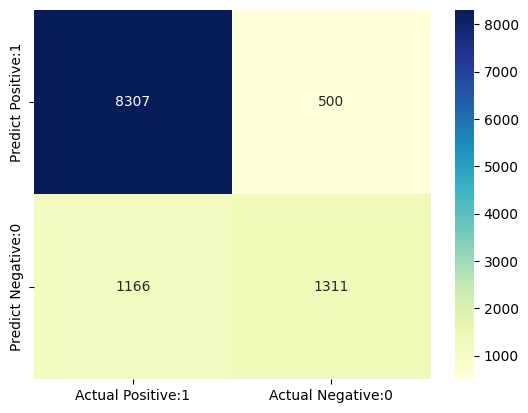

In [64]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [66]:
x2train, x2test, y2train, y2test = train_test_split(x2,y,test_size = 0.2)
log.fit(x2train, y2train)
y2predict = log.predict(x2test)
df = pd.DataFrame()
df["ytest"] = y2test
df["ypredict"] = y2predict
print(accuracy_score(y2test, y2predict))

0.8499645515774548


C:\Users\cspde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot: >

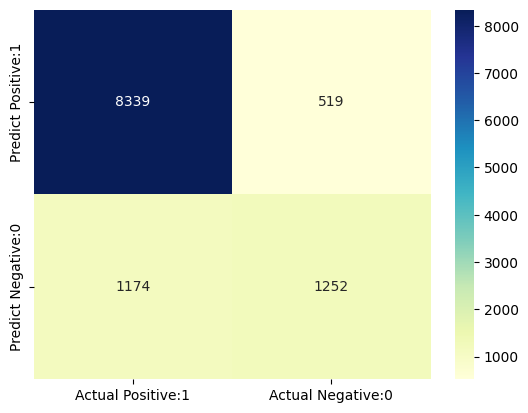

In [68]:
cm = confusion_matrix(y2test, y2predict)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')